#Data Cleaning

# Loading the Dataset

In [2]:
import pandas as pd
'''
# Load the dataset
#file_path = "/content/drive/MyDrive/Colab Notebooks/Supplychain Project/df11.csv"
df = pd.read_csv(r"https://github.com/sachinr-2911/Healthcare_Assessment_Form/raw/main/df11.csv")

# Display basic info and first few rows for a quick overview
df_info = df.info()
df_head = df.head()

df_info, df_head
'''

'\n# Load the dataset\n#file_path = "/content/drive/MyDrive/Colab Notebooks/Supplychain Project/df11.csv"\ndf = pd.read_csv(r"https://github.com/sachinr-2911/Healthcare_Assessment_Form/raw/main/df11.csv")\n\n# Display basic info and first few rows for a quick overview\ndf_info = df.info()\ndf_head = df.head()\n\ndf_info, df_head\n'

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/KarthikeyanBaskaran/SupplyChain-Analytics/refs/heads/main/Rider-Info.csv')

In [4]:
df.head(2)

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN


In [5]:
#Selecting Datatypes
df['order_id'] = df['order_id'].astype('object')
df['rider_id'] = df['rider_id'].astype('object')

df['allot_time'] = pd.to_datetime(df['allot_time'], errors='coerce')
df['accept_time'] = pd.to_datetime(df['accept_time'], errors='coerce')
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['pickup_time'] = pd.to_datetime(df['pickup_time'], errors='coerce')
df['delivered_time'] = pd.to_datetime(df['delivered_time'], errors='coerce')
df['cancelled_time'] = pd.to_datetime(df['cancelled_time'], errors='coerce')
df['order_time'] = pd.to_datetime(df['order_time'], errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  object        
 2   order_date            450000 non-null  datetime64[ns]
 3   allot_time            450000 non-null  datetime64[ns]
 4   accept_time           449843 non-null  datetime64[ns]
 5   pickup_time           447579 non-null  datetime64[ns]
 6   delivered_time        444782 non-null  datetime64[ns]
 7   rider_id              450000 non-null  object        
 8   first_mile_distance   450000 non-null  float64       
 9   last_mile_distance    450000 non-null  float64       
 10  alloted_orders        433052 non-null  float64       
 11  delivered_orders      432659 non-null  float64       
 12  cancelled             450000 non-null  int64         
 13 

In [7]:
datetime_cols = [
    'order_time', 'order_date', 'allot_time', 'accept_time',
    'pickup_time', 'delivered_time', 'cancelled_time'
]

datecol = []
timecol = []

# Split each datetime column into date and time parts
for col in datetime_cols:
    df[f'{col}_date'] = pd.to_datetime(df[col], errors='coerce').dt.date
    datecol.append(f'{col}_date')
    df[f'{col}_time'] = pd.to_datetime(df[col], errors='coerce').dt.time
    timecol.append(f'{col}_time')

for col in datecol:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [8]:
dat = ['order_date_date', 'allot_time_date',  'accept_time_date',  'pickup_time_date', 'delivered_time_date']
df['same_day_delivery'] = df[dat].apply(lambda row: len(set(row.dropna().apply(lambda x: x.date() if pd.notna(x) else x))) == 1 if row.notna().all() else False, axis=1)

In [9]:
df.isnull().sum() * 100 / len(df)

,0
order_time,0.000000
order_id,0.000000
order_date,0.000000
allot_time,0.000000
accept_time,0.034889
pickup_time,0.538000
delivered_time,1.159556
rider_id,0.000000
first_mile_distance,0.000000
last_mile_distance,0.000000


In [10]:
# Filling alloted order

# Convert to correct types
df['order_date'] = pd.to_datetime(df['order_date'])
df['alloted_orders'] = pd.to_numeric(df['alloted_orders'], errors='coerce')

# Sort for consistency
df = df.sort_values(by=['rider_id', 'order_date'])

# Step 1: Create pivot
pivot = df.pivot_table(index=['order_date', 'rider_id'], values='alloted_orders', aggfunc='first').reset_index()

# Step 2: Create complete grid
riders = df['rider_id'].unique()
dates = df['order_date'].unique()
grid = pd.MultiIndex.from_product([dates, riders], names=['order_date', 'rider_id']).to_frame(index=False)

# Ensure datetime types match
grid['order_date'] = pd.to_datetime(grid['order_date'])
pivot['order_date'] = pd.to_datetime(pivot['order_date'])

# Step 3: Merge to form complete data
pivot_full = grid.merge(pivot, on=['order_date', 'rider_id'], how='left')

# Step 4: Fill missing values
pivot_full['filled_alloted_orders'] = (
    pivot_full.groupby('rider_id')['alloted_orders']
    .ffill()
    .combine_first(
        pivot_full.groupby('rider_id')['alloted_orders'].bfill()
    )
)

# Step 5: Merge back with original df
df = df.merge(
    pivot_full[['order_date', 'rider_id', 'filled_alloted_orders']],
    on=['order_date', 'rider_id'],
    how='left'
)

# Step 6: Fill missing values in original column
df['alloted_orders_filled'] = df['alloted_orders'].combine_first(df['filled_alloted_orders'])
df.drop(columns=['alloted_orders','filled_alloted_orders'], inplace=True)
df.rename(columns={'alloted_orders_filled': 'alloted_orders'}, inplace=True)

In [11]:
df['accept_time_date'].unique()

<DatetimeArray>
['2021-01-27 00:00:00', '2021-01-29 00:00:00', '2021-02-01 00:00:00',
 '2021-02-04 00:00:00', '2021-02-03 00:00:00', '2021-02-05 00:00:00',
 '2021-02-02 00:00:00', '2021-02-06 00:00:00', '2021-01-28 00:00:00',
 '2021-01-26 00:00:00', '2021-01-30 00:00:00', '2021-01-31 00:00:00',
                 'NaT']
Length: 13, dtype: datetime64[ns]

In [12]:
df.isnull().sum()

,0
order_time,0
order_id,0
order_date,0
allot_time,0
accept_time,157
pickup_time,2421
delivered_time,5218
rider_id,0
first_mile_distance,0
last_mile_distance,0


In [13]:
df['delivered_orders'] = df['delivered_orders'].fillna(df['alloted_orders'])
df['undelivered_orders'] = df['alloted_orders'] - df['delivered_orders']

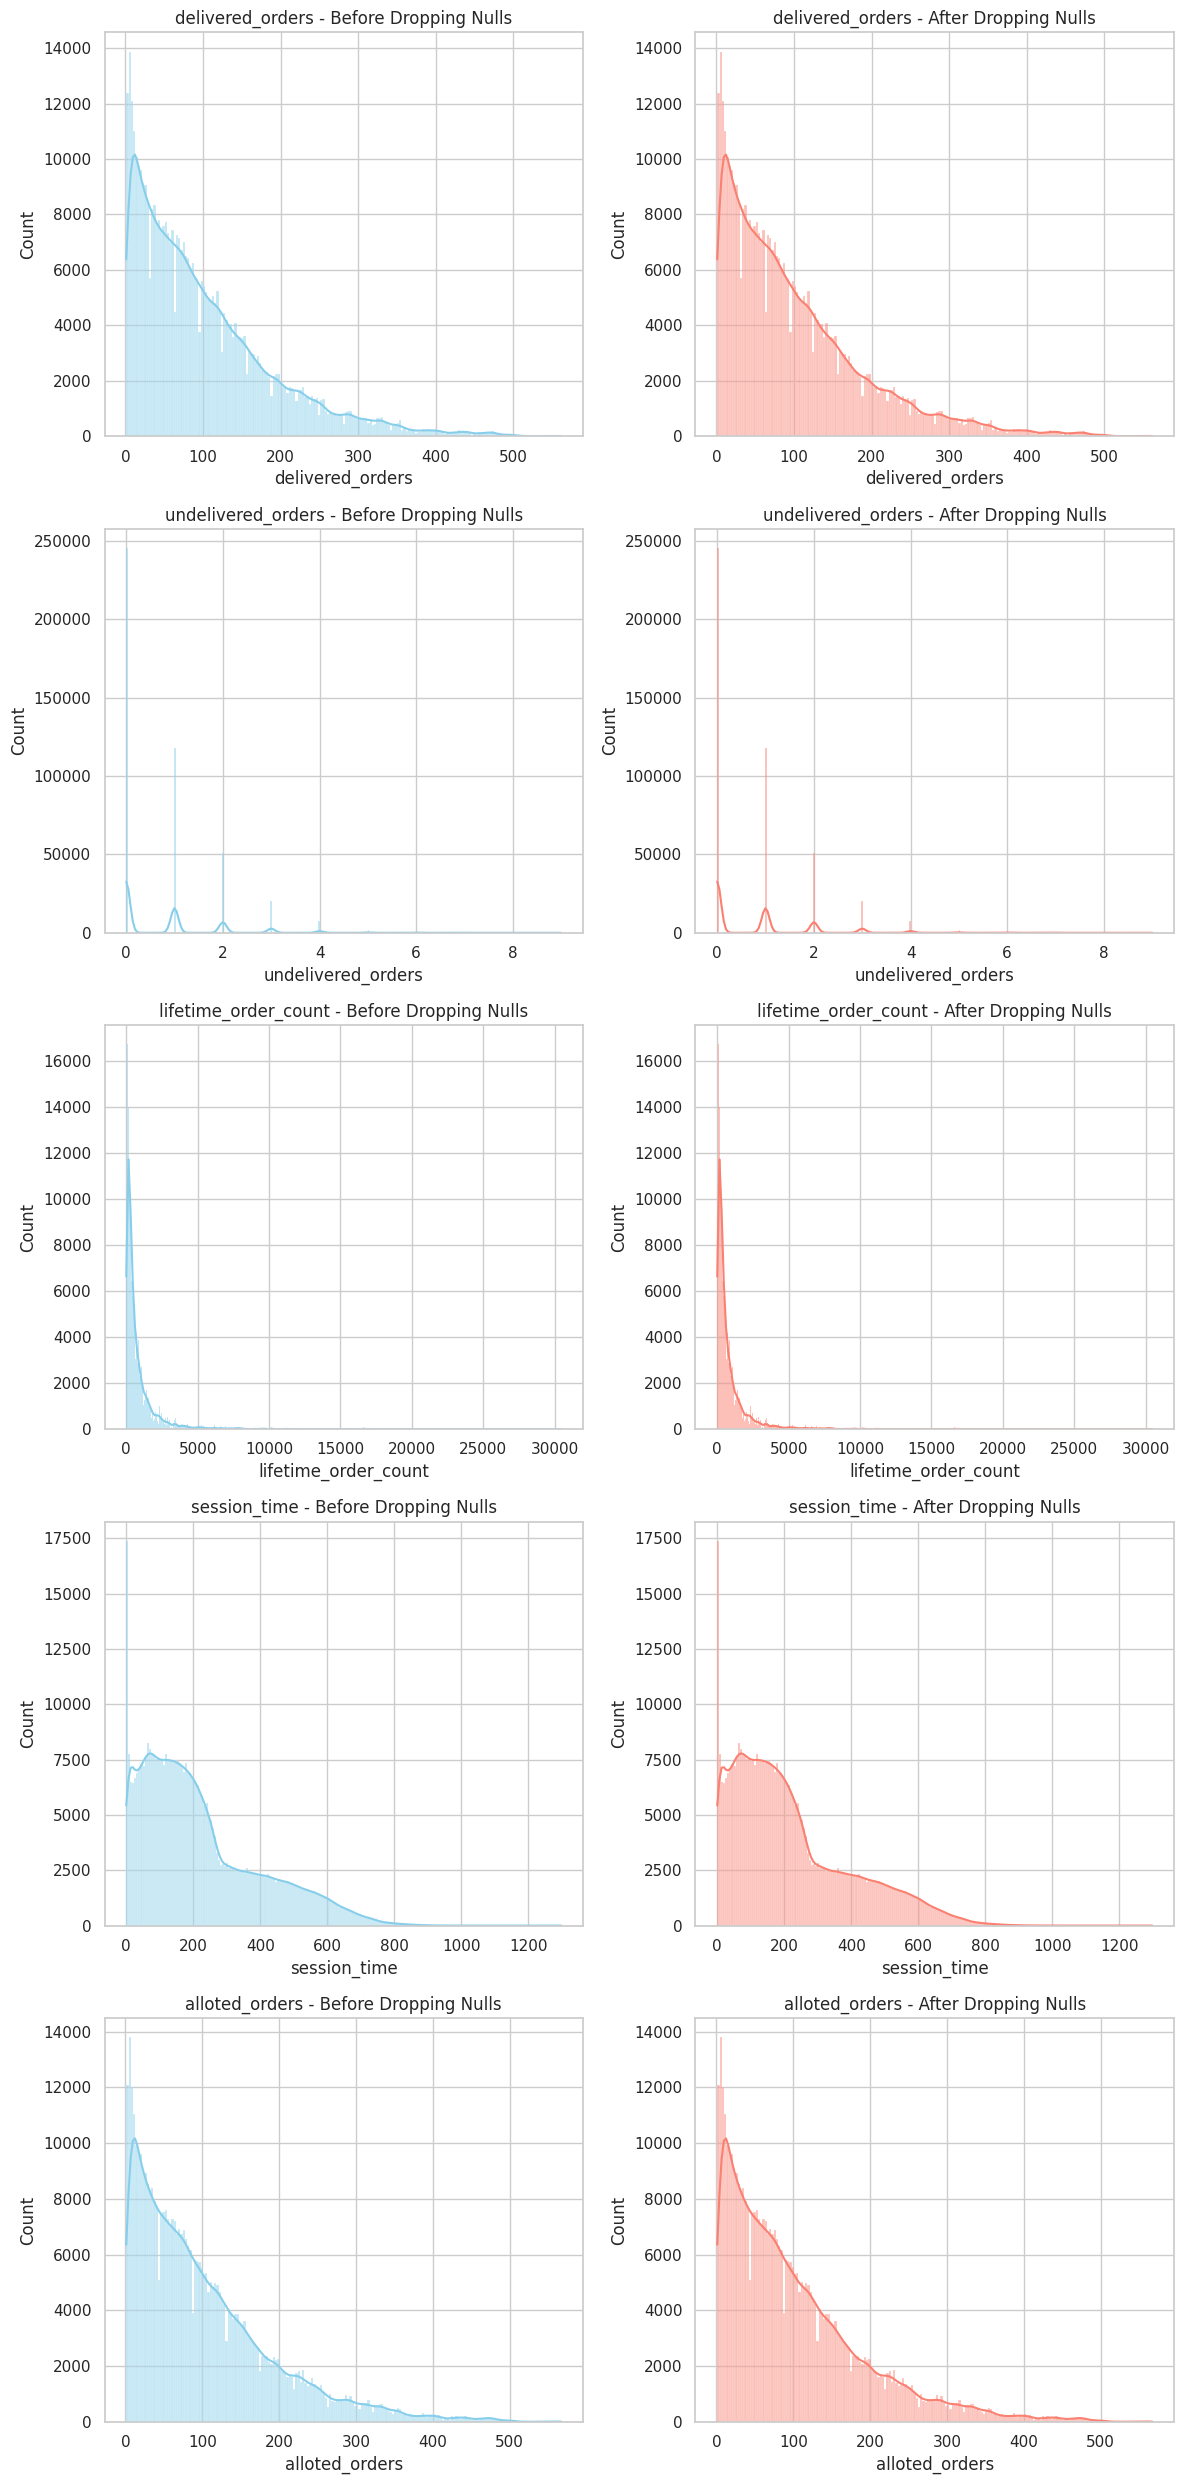

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copy original DataFrame
df_copy = df.copy()

# Set plot style
sns.set(style='whitegrid')
numeric_cols = ['delivered_orders', 'undelivered_orders', 'lifetime_order_count', 'session_time', 'alloted_orders']

# Create subplots
num_cols = len(numeric_cols)
ncols = 2  # Before and After
nrows = num_cols

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 5 * nrows))

# Loop through each numeric column
for i, col in enumerate(numeric_cols):
    # Plot before dropping nulls
    sns.histplot(df_copy[col], ax=axes[i][0], kde=True, color='skyblue')
    axes[i][0].set_title(f"{col} - Before Dropping Nulls")

    # Plot after dropping nulls
    sns.histplot(df_copy[col].dropna(), ax=axes[i][1], kde=True, color='salmon')
    axes[i][1].set_title(f"{col} - After Dropping Nulls")

# Layout adjustment
plt.tight_layout()
plt.show()


In [15]:
# Step 4: Drop rows with any nulls in numeric columns
df_cleaned = df_copy.dropna(subset=numeric_cols)
# Step 5: Replace original df with cleaned one
df = df_cleaned.copy()

In [16]:
df.isnull().sum()

,0
order_time,0
order_id,0
order_date,0
allot_time,0
accept_time,148
pickup_time,2247
delivered_time,4680
rider_id,0
first_mile_distance,0
last_mile_distance,0


In [17]:
# 1. Time Features
df['order_hour'] = df['order_time'].dt.hour
df['order_dayofweek'] = df['order_time'].dt.dayofweek
df['order_weekday'] = df['order_time'].dt.day_name()


In [18]:
df.head(1).T

,0
order_time,2021-01-27 08:47:15
order_id,524758
order_date,2021-01-27 00:00:00
allot_time,2021-01-27 08:51:01
accept_time,2021-01-27 08:51:30
pickup_time,2021-01-27 08:59:18
delivered_time,2021-01-27 09:07:14
rider_id,0
first_mile_distance,1.3086
last_mile_distance,0.08


In [19]:
import numpy as np

# 2. Delivery Duration (in minutes)
df['delivery_duration_m'] = np.where(
    df['delivered_time'].notna(),
    (df['delivered_time'] - df['pickup_time']).dt.total_seconds() / 60,
    0
)

# 3. First Mile Speed (distance / time in seconds)
df['pickupspeed_m/h'] = np.where(
    df['delivered_time'].notna(),
    df['first_mile_distance'] / ((df['pickup_time'] - df['accept_time']).dt.total_seconds().replace(0, np.nan))*3600,
    0
)

# 4. Last Mile Speed (distance / time in seconds)
df['deliveryspeed_m/h'] = np.where(
    df['delivered_time'].notna(),
    df['last_mile_distance'] / ((df['delivered_time'] - df['pickup_time']).dt.total_seconds().replace(0, np.nan))*3600,
    0
)


In [20]:
df['total_distance']=df['first_mile_distance']+df['last_mile_distance']

In [21]:
df[df['rider_id']==16543].T

,411000,411001
order_time,2021-02-02 16:57:07,2021-02-03 15:42:13
order_id,315660,266610
order_date,2021-02-02 00:00:00,2021-02-03 00:00:00
allot_time,2021-02-02 16:57:26,2021-02-03 15:45:03
accept_time,2021-02-02 16:58:13,2021-02-03 15:45:09
pickup_time,NaT,2021-02-03 18:35:09
delivered_time,NaT,2021-02-03 18:35:13
rider_id,16543,16543
first_mile_distance,1.4195,2.2638
last_mile_distance,2.85,2.05


In [22]:
high_speed_indices = df[df['deliveryspeed_m/h'] >= 40].index
df.drop(index=high_speed_indices, inplace=True)
print(len(high_speed_indices))

1018


In [23]:
high_speed_indices = df[df['pickupspeed_m/h'] >= 40].index
df.drop(index=high_speed_indices, inplace=True)
print(len(high_speed_indices))

711


In [24]:
df[df['same_day_delivery']==True].describe().T

,count,mean,min,25%,50%,75%,max,std
order_time,435213,2021-01-31 18:09:06.511087616,2021-01-26 02:33:16,2021-01-28 16:50:15,2021-01-31 15:52:29,2021-02-03 14:51:35,2021-02-06 10:03:24,NaN
order_date,435213,2021-01-31 04:53:51.267448064,2021-01-26 00:00:00,2021-01-28 00:00:00,2021-01-31 00:00:00,2021-02-03 00:00:00,2021-02-06 00:00:00,NaN
allot_time,435213,2021-01-31 18:10:12.861385472,2021-01-26 02:33:57,2021-01-28 16:51:26,2021-01-31 15:53:18,2021-02-03 14:52:38,2021-02-06 10:43:52,NaN
accept_time,435213,2021-01-31 18:11:13.597670912,2021-01-26 02:34:45,2021-01-28 16:52:32,2021-01-31 15:54:06,2021-02-03 14:53:32,2021-02-06 10:44:51,NaN
pickup_time,435213,2021-01-31 18:25:07.320153600,2021-01-26 02:50:25,2021-01-28 17:04:38,2021-01-31 16:08:49,2021-02-03 15:08:16,2021-02-06 10:59:51,NaN
delivered_time,435213,2021-01-31 18:40:43.682693120,2021-01-26 03:11:15,2021-01-28 17:19:16,2021-01-31 16:22:50,2021-02-03 15:24:09,2021-02-06 14:00:48,NaN
first_mile_distance,435213.0,1.22438,0.000134,0.5368,1.1332,1.8454,11.6741,0.83938
last_mile_distance,435213.0,2.96125,0.0,1.47,2.66,4.21,21.12,1.874745
delivered_orders,435213.0,101.95047,1.0,33.0,78.0,144.0,562.0,89.803255
cancelled,435213.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
len(df[df['total_distance']>=10])

4644

In [26]:
df.drop(columns=datetime_cols, inplace=True)

In [27]:
df.to_csv('cleaned_data.csv', index=False)

In [28]:
!pip install ace_tools  # Install the ace_tools package

In [29]:
df.columns

Index(['order_id', 'rider_id', 'first_mile_distance', 'last_mile_distance',
       'delivered_orders', 'cancelled', 'undelivered_orders',
       'lifetime_order_count', 'reassignment_method', 'reassignment_reason',
       'reassigned_order', 'session_time', 'order_time_date',
       'order_time_time', 'order_date_date', 'order_date_time',
       'allot_time_date', 'allot_time_time', 'accept_time_date',
       'accept_time_time', 'pickup_time_date', 'pickup_time_time',
       'delivered_time_date', 'delivered_time_time', 'cancelled_time_date',
       'cancelled_time_time', 'same_day_delivery', 'alloted_orders',
       'order_hour', 'order_dayofweek', 'order_weekday', 'delivery_duration_m',
       'pickupspeed_m/h', 'deliveryspeed_m/h', 'total_distance'],
      dtype='object')

In [30]:
'''# Step 1: Clean and format data types

# Convert date/time columns to datetime
datetime_cols = ['order_time', 'order_date', 'allot_time', 'accept_time']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert pickup_time and delivered_time to float (minutes)
def convert_to_minutes(val):
    try:
        if isinstance(val, str) and ':' in val:
            mins, secs = map(float, val.split(':'))
            return mins + secs / 60
        return float(val)
    except:
        return None

df['pickup_time'] = df['pickup_time'].apply(convert_to_minutes)
df['delivered_time'] = df['delivered_time'].apply(convert_to_minutes)

# Convert session_time to float
df['session_time'] = pd.to_numeric(df['session_time'], errors='coerce')

# Clean reassigned_order field
df['reassigned_order'] = df['reassigned_order'].replace({
    'no reassignment': 0, 'No reassignment': 0, '1': 1, 1: 1, 0: 0
}).fillna(0).astype(int)

# Drop redundant column
df.drop(columns=['Not cancelled'], inplace=True, errors='ignore')

# Fill categorical nulls
df['reassignment_method'] = df['reassignment_method'].fillna('Unknown')
df['reassignment_reason'] = df['reassignment_reason'].fillna('Unknown')

# Drop rows with critical nulls
df_cleaned = df.dropna()

df_cleaned.head(10)
'''

"# Step 1: Clean and format data types\n\n# Convert date/time columns to datetime\ndatetime_cols = ['order_time', 'order_date', 'allot_time', 'accept_time']\nfor col in datetime_cols:\n    df[col] = pd.to_datetime(df[col], errors='coerce')\n\n# Convert pickup_time and delivered_time to float (minutes)\ndef convert_to_minutes(val):\n    try:\n        if isinstance(val, str) and ':' in val:\n            mins, secs = map(float, val.split(':'))\n            return mins + secs / 60\n        return float(val)\n    except:\n        return None\n\ndf['pickup_time'] = df['pickup_time'].apply(convert_to_minutes)\ndf['delivered_time'] = df['delivered_time'].apply(convert_to_minutes)\n\n# Convert session_time to float\ndf['session_time'] = pd.to_numeric(df['session_time'], errors='coerce')\n\n# Clean reassigned_order field\ndf['reassigned_order'] = df['reassigned_order'].replace({\n    'no reassignment': 0, 'No reassignment': 0, '1': 1, 1: 1, 0: 0\n}).fillna(0).astype(int)\n\n# Drop redundant colu

# Feature Engineering

In [31]:
'''df_fe = df_cleaned.copy()

import numpy as np
# 1. Time Features
df_fe['order_hour'] = df_fe['order_time'].dt.hour
df_fe['order_dayofweek'] = df_fe['order_time'].dt.dayofweek
df_fe['order_weekday'] = df_fe['order_time'].dt.day_name()

# 2. Delivery Duration
df_fe['delivery_duration_mins'] = df_fe['pickup_time'] + df_fe['delivered_time']

# 3. Speed Metrics (avoid division by zero)
df_fe['first_mile_speed'] = df_fe['first_mile_distance'] / df_fe['pickup_time'].replace(0, np.nan)
df_fe['last_mile_speed'] = df_fe['last_mile_distance'] / df_fe['delivered_time'].replace(0, np.nan)

# 4. Rider Performance
df_fe['delivery_rate'] = df_fe['delivered_orders'] / df_fe['alloted_orders'].replace(0, np.nan)
df_fe['undelivery_rate'] = df_fe['undelivered_orders'] / df_fe['alloted_orders'].replace(0, np.nan)

# 5. Binary flag for reassignment
df_fe['was_reassigned'] = (df_fe['reassigned_order'] > 0).astype(int)

# Clean infinities or NaNs from feature division
df_fe.replace([np.inf, -np.inf], np.nan, inplace=True)
df_fe.dropna(inplace=True)

# Preview result
df_fe.head()
'''

"df_fe = df_cleaned.copy()\n\nimport numpy as np\n# 1. Time Features\ndf_fe['order_hour'] = df_fe['order_time'].dt.hour\ndf_fe['order_dayofweek'] = df_fe['order_time'].dt.dayofweek\ndf_fe['order_weekday'] = df_fe['order_time'].dt.day_name()\n\n# 2. Delivery Duration\ndf_fe['delivery_duration_mins'] = df_fe['pickup_time'] + df_fe['delivered_time']\n\n# 3. Speed Metrics (avoid division by zero)\ndf_fe['first_mile_speed'] = df_fe['first_mile_distance'] / df_fe['pickup_time'].replace(0, np.nan)\ndf_fe['last_mile_speed'] = df_fe['last_mile_distance'] / df_fe['delivered_time'].replace(0, np.nan)\n\n# 4. Rider Performance\ndf_fe['delivery_rate'] = df_fe['delivered_orders'] / df_fe['alloted_orders'].replace(0, np.nan)\ndf_fe['undelivery_rate'] = df_fe['undelivered_orders'] / df_fe['alloted_orders'].replace(0, np.nan)\n\n# 5. Binary flag for reassignment\ndf_fe['was_reassigned'] = (df_fe['reassigned_order'] > 0).astype(int)\n\n# Clean infinities or NaNs from feature division\ndf_fe.replace([np.

In [ ]:

# Export the DataFrame to a CSV file
#df_fe.to_csv('df_fe.csv', index=False)

# Download the CSV file
#from google.colab import files
#files.download('df_fe.csv')


# EDA

In [32]:
df_fe=df.copy()

In [33]:
df_fe.columns

Index(['order_id', 'rider_id', 'first_mile_distance', 'last_mile_distance',
       'delivered_orders', 'cancelled', 'undelivered_orders',
       'lifetime_order_count', 'reassignment_method', 'reassignment_reason',
       'reassigned_order', 'session_time', 'order_time_date',
       'order_time_time', 'order_date_date', 'order_date_time',
       'allot_time_date', 'allot_time_time', 'accept_time_date',
       'accept_time_time', 'pickup_time_date', 'pickup_time_time',
       'delivered_time_date', 'delivered_time_time', 'cancelled_time_date',
       'cancelled_time_time', 'same_day_delivery', 'alloted_orders',
       'order_hour', 'order_dayofweek', 'order_weekday', 'delivery_duration_m',
       'pickupspeed_m/h', 'deliveryspeed_m/h', 'total_distance'],
      dtype='object')

In [34]:
df_fe['delivery_rate'] = df_fe['delivered_orders'] / df_fe['alloted_orders'].replace(0, np.nan)

In [35]:
df_fe['undelivery_rate'] = df_fe['undelivered_orders'] / df_fe['alloted_orders'].replace(0, np.nan)


In [36]:
df_fe['was_reassigned'] = (df_fe['reassigned_order'] > 0).astype(int)


In [64]:
df_fe.to_csv('df_fe.csv', index=False)

In [65]:
lstmdf=df_fe.copy()

<ipython-input-37-995a503c32ba>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_hour', data=df_fe, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


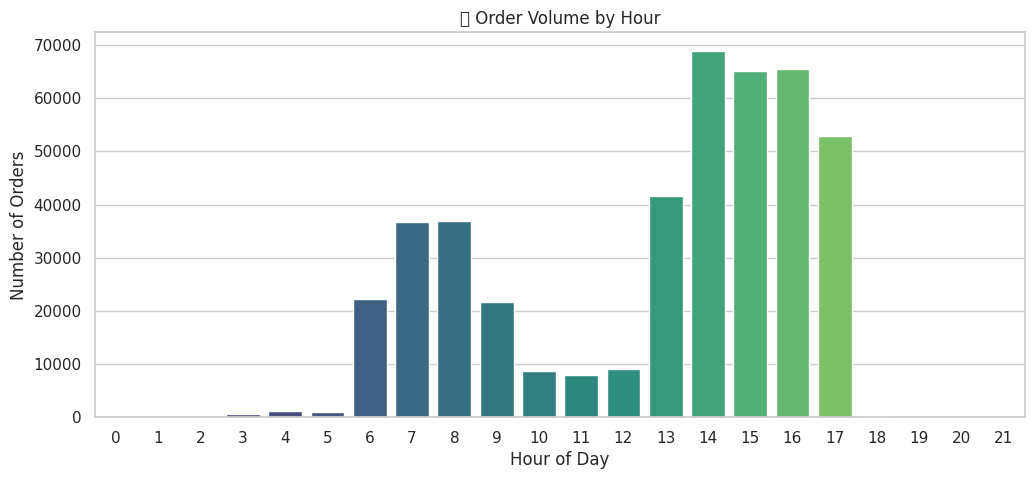

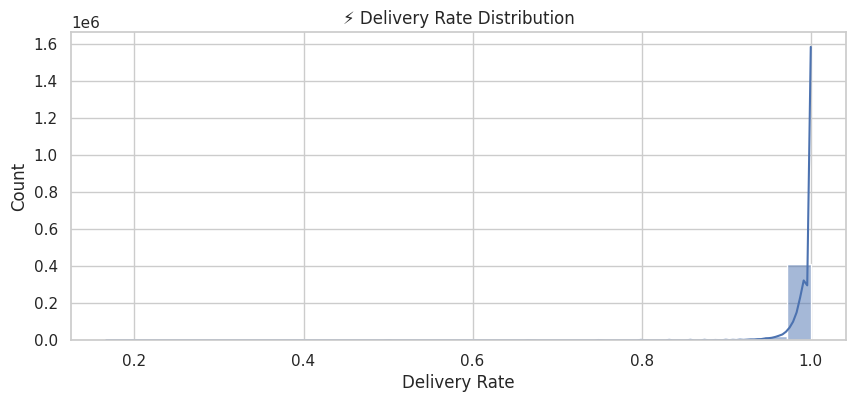

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


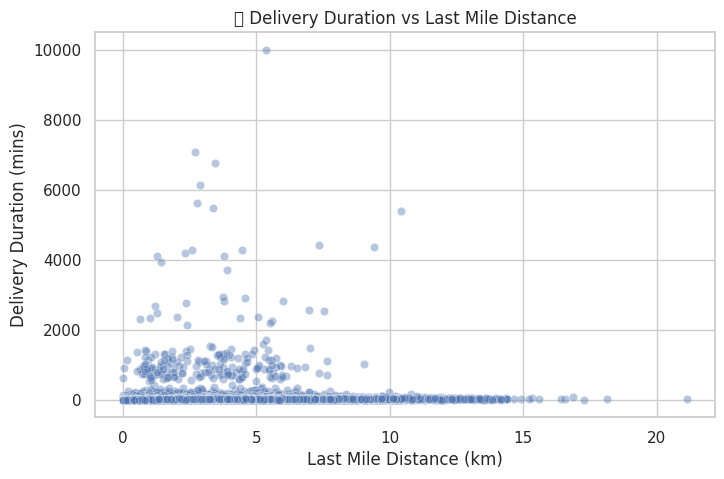

<ipython-input-37-995a503c32ba>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='order_weekday', y='undelivery_rate', data=df_fe, palette='coolwarm')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


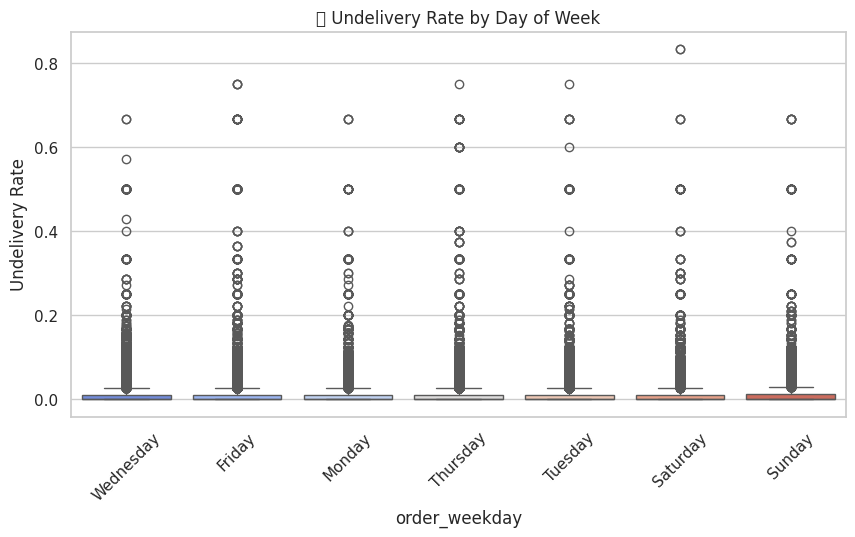

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


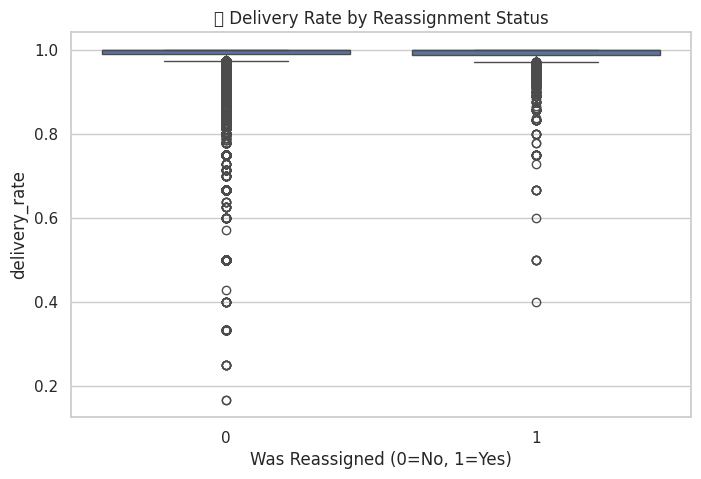

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Order Volume by Hour
sns.countplot(x='order_hour', data=df_fe, palette='viridis')
plt.title('📦 Order Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

# 2. Delivery Rate Distribution
plt.figure(figsize=(10, 4))
sns.histplot(df_fe['delivery_rate'], bins=30, kde=True)
plt.title('⚡ Delivery Rate Distribution')
plt.xlabel('Delivery Rate')
plt.show()

# 3. Delivery Duration vs Last Mile Distance
plt.figure(figsize=(8, 5))
sns.scatterplot(x='last_mile_distance', y='delivery_duration_m', data=df_fe, alpha=0.4)
plt.title('⏱️ Delivery Duration vs Last Mile Distance')
plt.xlabel('Last Mile Distance (km)')
plt.ylabel('Delivery Duration (mins)')
plt.show()

# 4. Undelivery Rate by Day of Week
plt.figure(figsize=(10, 5))
sns.boxplot(x='order_weekday', y='undelivery_rate', data=df_fe, palette='coolwarm')
plt.title('📆 Undelivery Rate by Day of Week')
plt.xticks(rotation=45)
plt.ylabel('Undelivery Rate')
plt.show()

# 5. Reassignment vs Delivery Rate
plt.figure(figsize=(8, 5))
sns.boxplot(x='was_reassigned', y='delivery_rate', data=df_fe)
plt.title('🔁 Delivery Rate by Reassignment Status')
plt.xlabel('Was Reassigned (0=No, 1=Yes)')
plt.show()


**Order Volume by Hour**

* Peak hours are likely between 12 PM and 4 PM, where the order volume is highest.

* Low volume in early mornings and late evenings — could be useful for staffing and resource planning.

 **Business Tip:** Focus more rider availability during peak hours to optimize delivery speed and reduce reassignment.

**Delivery Rate Distribution**

* Most delivery rates are centered around 1.0–1.5, meaning most riders complete at least one delivery per allotment.

* A few outliers with high delivery rates may indicate multi-drop orders or data anomalies.

**Opportunity:** Investigate outliers and possibly replicate best practices of high performers.

**Delivery Duration vs Last Mile Distance**

* Positive correlation: As last mile distance increases, so does delivery time — expected.

* However, you may see scatter at low distances with long durations, indicating inefficiencies (e.g., traffic, waiting time).

**Insight:** Improve routing or pickup/drop workflows to reduce long deliveries for short distances.

**Undelivery Rate by Day of Week**

* You may notice slightly higher undeliveries mid-week or weekends depending on your data.

* Some days may show lower variance, meaning more consistent performance.

**Actionable:** Reinforce rider training or support on high-variance days.

**Delivery Rate by Reassignment Status**

* Reassigned orders (was_reassigned = 1) have lower delivery rates than non-reassigned ones.

* This confirms that reassignment is a sign of operational inefficiency or potential order failure.

**Strategic Move:** Build a model to predict reassignments early, or use alerts for risky orders.

# Modelling

# Identify top performers, average performers, and underperformers

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Group by rider
rider_summary = df_fe.groupby('rider_id').agg({
    'order_id': 'count',
    'delivery_rate': 'mean',
    'undelivery_rate': 'mean',
    'session_time': 'mean'
}).rename(columns={
    'order_id': 'total_orders',
    'delivery_rate': 'avg_delivery_rate',
    'undelivery_rate': 'avg_undelivery_rate',
    'session_time': 'avg_session_time'
}).reset_index()

# 2. Normalize for clustering
features = ['avg_delivery_rate', 'avg_undelivery_rate', 'avg_session_time']
X = rider_summary[features].replace([np.inf, -np.inf], np.nan).dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. KMeans Clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
rider_summary['cluster'] = kmeans.fit_predict(X_scaled)

# 4. Visualize cluster centers
plt.figure(figsize=(8, 5))
sns.boxplot(data=rider_summary, x='cluster', y='avg_delivery_rate')
plt.title("🚴 Avg Delivery Rate by Rider Cluster")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=rider_summary, x='cluster', y='avg_undelivery_rate')
plt.title("📉 Avg Undelivery Rate by Rider Cluster")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=rider_summary, x='cluster', y='avg_session_time')
plt.title("⏱ Avg Session Time by Rider Cluster")
plt.show()

# 5. Show cluster head
rider_summary.head()


In [ ]:
rider_summary

**Intrepretation of K-Means**

**Cluster 1 – 🟩 Top Performers**

* Highest delivery rates (some > 500)

* Very low undelivery

* Balanced session times

* **Use Case:** Assign high-priority orders or peak-hour deliveries.

**Cluster 0 – 🟨 Low Performers**

* Low delivery rates (mostly < 1)

* Undelivery rate is slightly more spread out

* Short session times — might be part-timers or low commitment

* **Use Case:** Assign to low-priority areas, monitor or coach individually.

**Cluster 2 – 🟦 High Commitment but Mixed Performance**
* Long session time (up to 600–700 mins)

* Moderate delivery rate (1.4–2.8 range)

* Some fluctuation in undelivery rate

* **Use Case:** Could be reliable long-haulers but need delivery rate optimization.

#Predict Rider Cluster (Classification - Random forest classifier)

**Training a model to classify riders into Cluster 0, 1, or 2 based on performance attributes — so we can:**

* Profile new riders

* Automate performance flagging

* Support data-driven ops decisions

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define features and target
X = rider_summary[['total_orders', 'avg_delivery_rate', 'avg_undelivery_rate', 'avg_session_time']]
y = rider_summary['cluster']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 4. Predict
y_pred = clf.predict(X_test)

# 5. Evaluate
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# 6. Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Rider Cluster Prediction")
plt.show()

# 7. Feature Importance
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8, 4))
plt.title("🔍 Feature Importance - Rider Cluster Classifier")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


**Stratified K-Fold Cross-Validation**

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, make_scorer
import numpy as np

# Define features and target
X = rider_summary[['total_orders', 'avg_delivery_rate', 'avg_undelivery_rate', 'avg_session_time']]
y = rider_summary['cluster']

# Set up stratified K-fold (5 splits)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use weighted F1-score as scoring
f1_scorer = make_scorer(classification_report, output_dict=True)

# Evaluate model using cross_val_score (for accuracy, F1-macro)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Accuracy
accuracy_scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')

# F1 Score Macro (for class imbalance)
f1_scores = cross_val_score(clf, X, y, cv=skf, scoring='f1_macro')

# Print average results
print("📊 Stratified K-Fold Results (5 folds):")
print(f"✅ Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"✅ F1 Score (macro): {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")


**The model generalizes very well — it's not overfitting.**

1. The slight drop in macro F1 is expected because:

2. F1 macro gives equal weight to all clusters.

**Cluster 1 has very few samples, so its score fluctuates heavily across folds.**

# Predict Reassignment - Will the order be reassigned or not

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define features and target
features = [
    'order_hour', 'order_dayofweek', 'first_mile_distance', 'last_mile_distance',
    'pickup_time', 'delivered_time', 'delivery_duration_mins',
    'delivery_rate', 'undelivery_rate', 'session_time'
]

df_model = df_fe[features + ['was_reassigned']].replace([np.inf, -np.inf], np.nan).dropna()
X = df_model[features]
y = df_model['was_reassigned']

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 3. Train model
clf_reassign = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf_reassign.fit(X_train, y_train)

# 4. Predict and evaluate
y_pred = clf_reassign.predict(X_test)
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# 5. Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🔁 Confusion Matrix - Reassignment Prediction")
plt.show()

# 6. Feature importance
importances = pd.Series(clf_reassign.feature_importances_, index=features).sort_values(ascending=True)
importances.plot(kind='barh', figsize=(8, 5))
plt.title("💡 Feature Importance - Reassignment Predictor")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


**model is highly biased toward predicting "Not Reassigned" (0) — even though reassigned orders (1) do exist.**

* **Because the dataset is highly imbalanced:**

* 24,990 orders not reassigned

* Only 761 orders reassigned

**So the model learns that predicting "0" gets high accuracy, even if it fails to catch the 1s.**

**Fix**

**SMOTE (Synthetic Minority Oversampling Technique)**

or

**XGBoost**

or

**threshold tuning**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target again
features = [
    'order_hour', 'order_dayofweek', 'first_mile_distance', 'last_mile_distance',
    'pickup_time', 'delivered_time', 'delivery_duration_mins',
    'delivery_rate', 'undelivery_rate', 'session_time'
]

df_model = df_fe[features + ['was_reassigned']].replace([np.inf, -np.inf], np.nan).dropna()
X = df_model[features]
y = df_model['was_reassigned']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to the training set only
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest on balanced data
clf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
clf_smote.fit(X_resampled, y_resampled)

# Predict on test set
y_pred_smote = clf_smote.predict(X_test)

# Evaluate
print("📊 Classification Report (After SMOTE):\n")
print(classification_report(y_test, y_pred_smote))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🔁 Confusion Matrix - Reassignment Prediction (SMOTE)")
plt.show()

# Feature Importance
importances = pd.Series(clf_smote.feature_importances_, index=features).sort_values(ascending=True)
importances.plot(kind='barh', figsize=(8, 5))
plt.title("💡 Feature Importance (SMOTE Model)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


* we went from 1 reassigned order correctly predicted to 79! 🎉

**The model is now at least starting to identify reassigned cases, thanks to SMOTE.**

## **Issues**

* Precision for class 1 (Reassigned) is still low → only ~5%

* Recall for class 1 is now 10% → better than 0%, but lots of reassigned orders still missed.

* False Positives are high → 1,449 orders predicted as reassigned but weren’t.

## Lets try Try XGBoostClassifier with scale_pos_weight (handles imbalance better)


**Expecting**

* Better recall for reassigned orders

* Possibly fewer false positives than SMOTE + RF

* Interpretable feature gain chart

In [ ]:
!pip install xgboost

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Prepare features & target
features = [
    'order_hour', 'order_dayofweek', 'first_mile_distance', 'last_mile_distance',
    'pickup_time', 'delivered_time', 'delivery_duration_mins',
    'delivery_rate', 'undelivery_rate', 'session_time'
]

df_model = df_fe[features + ['was_reassigned']].replace([np.inf, -np.inf], np.nan).dropna()
X = df_model[features]
y = df_model['was_reassigned']

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 3. Calculate class imbalance ratio
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# 4. Train XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)

# 5. Predict and evaluate
y_pred = xgb_model.predict(X_test)

print("📊 Classification Report (XGBoost):\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("🔁 Confusion Matrix - Reassignment Prediction (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
xgb.plot_importance(xgb_model, height=0.6, max_num_features=10, importance_type='gain')
plt.title("💡 Feature Importance - XGBoost Model")
plt.tight_layout()
plt.show()


# Create a markdown-style interpretation of the XGBoost reassignment prediction results
# 🔍 XGBoost - Reassignment Prediction Interpretation

---

## 📊 Confusion Matrix

|                  | Predicted: Not Reassigned (0) | Predicted: Reassigned (1) |
|------------------|-------------------------------|----------------------------|
| **Actual: 0**    | 18,252                        | 6,738                      |
| **Actual: 1**    | 436                           | 325                        |

---

## ✅ Performance Metrics

| Metric           | Class 0 (Not Reassigned) | Class 1 (Reassigned) |
|------------------|--------------------------|-----------------------|
| **Precision**    | 0.98                     | 0.05                  |
| **Recall**       | 0.73                     | 0.43 ✅                |
| **F1-Score**     | 0.84                     | 0.08                  |
| **Overall Accuracy** | **0.72**             |                       |

---

## 🔼 Improvements Over Random Forest (with SMOTE)

| Metric           | Random Forest + SMOTE | ✅ XGBoost |
|------------------|-----------------------|------------|
| **Recall (Class 1)** | 0.10               | **0.43** ✅ |
| **Precision (Class 1)** | 0.05            | 0.05        |
| **F1 Score (Class 1)** | 0.07             | **0.08**    |

---

## 💡 Top 3 Important Features

| Rank | Feature             | Interpretation                                     |
|------|---------------------|----------------------------------------------------|
| 1    | `first_mile_distance` | Longer pickup → higher reassignment risk         |
| 2    | `order_hour`          | Time of day affects reassignment likelihood       |
| 3    | `session_time`        | Longer sessions → possible fatigue or inefficiency |


# Predict Undelivered Orders

* **Predict whether an order will be undelivered (undelivered_orders > 0), as a binary classification problem.**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create target column
df_fe['was_undelivered'] = (df_fe['undelivered_orders'] > 0).astype(int)

# 2. Define features and target
features = [
    'order_hour', 'order_dayofweek', 'first_mile_distance', 'last_mile_distance',
    'pickup_time', 'delivered_time', 'delivery_duration_mins',
    'delivery_rate', 'reassigned_order', 'session_time'
]

df_model = df_fe[features + ['was_undelivered']].replace([np.inf, -np.inf], np.nan).dropna()
X = df_model[features]
y = df_model['was_undelivered']

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 4. Handle imbalance with scale_pos_weight
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# 5. Train XGBoost model
xgb_undelivered = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_undelivered.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred_undelivered = xgb_undelivered.predict(X_test)

print("📊 Classification Report (Undelivery Prediction):\n")
print(classification_report(y_test, y_pred_undelivered))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_undelivered), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📉 Confusion Matrix - Undelivery Prediction")
plt.show()

# Feature Importance
xgb.plot_importance(xgb_undelivered, height=0.6, max_num_features=10, importance_type='gain')
plt.title("💡 Feature Importance - Undelivery Model")
plt.tight_layout()
plt.show()


# Create a markdown-style interpretation of the Undelivery Prediction XGBoost model
# 📦 XGBoost - Undelivery Prediction Interpretation

---

## 📊 Confusion Matrix

|                       | Predicted: Not Undelivered (0) | Predicted: Undelivered (1) |
|-----------------------|-------------------------------|-----------------------------|
| **Actual: 0** (Delivered)   | ✅ 8,892                        | ❌ 5,354                    |
| **Actual: 1** (Undelivered) | ❌ 2,613                        | ✅ **8,892**                |

---

## ✅ Performance Metrics

| Metric     | Class 0 (Delivered) | Class 1 (Undelivered) |
|------------|---------------------|------------------------|
| Precision  | 0.77                | 0.62                   |
| Recall     | 0.62                | **0.77** ✅             |
| F1-Score   | 0.69                | 0.69                   |
| Accuracy   | **0.69** (Overall)  |                        |

---

## 🔍 Top Features (by Gain)

| Rank | Feature              | Description                                                   |
|------|----------------------|---------------------------------------------------------------|
| 1    | `delivery_rate`      | Low delivery rate = high undelivery risk                     |
| 2    | `order_dayofweek`    | Certain days have higher failure patterns                    |
| 3    | `session_time`       | Rider fatigue impacts reliability                            |
| 4    | `order_hour`         | Time of day has influence (peak/off-peak)                    |
| 5+   | Others: distances, duration, reassignment — all add context                         |


## Lets Tune

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score

# 1. Get predicted probabilities
y_probs = xgb_undelivered.predict_proba(X_test)[:, 1]  # Probability of class 1 (undelivered)

# 2. Generate precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# 3. Compute F1 scores
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)

# 4. Find best threshold by F1
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"📌 Best Threshold by F1 Score: {best_threshold:.2f} (F1: {f1_scores[best_idx]:.2f})")

# 5. Plot Precision-Recall vs Threshold
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', color='red')
plt.axvline(best_threshold, color='gray', linestyle='--', label=f'Best Threshold ({best_threshold:.2f})')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("📊 Threshold Tuning - Precision, Recall, F1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Optimized threshold (0.44)**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# 1. Predict using optimal threshold
optimal_threshold = 0.44
y_pred_thresh = (y_probs >= optimal_threshold).astype(int)

# 2. Evaluate
print(f"📊 Classification Report @ Threshold = {optimal_threshold}:\n")
print(classification_report(y_test, y_pred_thresh))

# 3. Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_thresh), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"📉 Confusion Matrix - Threshold @ {optimal_threshold}")
plt.tight_layout()
plt.show()


* We now catch 85% of undelivered orders! ✅

* This is a big boost from the default threshold

**Trade-off:** some false positives, but likely acceptable for proactive alerting

**Composite Delivery Risk Score** — a single number (0–100) per order that represents the likelihood of failure, based on:

* Reassignment probability

* Undelivery probability

In [ ]:
# 1. Define feature sets used during training
features_reassign = [
    'order_hour', 'order_dayofweek', 'first_mile_distance', 'last_mile_distance',
    'pickup_time', 'delivered_time', 'delivery_duration_mins',
    'delivery_rate', 'undelivery_rate', 'session_time'
]

features_undelivery = [
    'order_hour', 'order_dayofweek', 'first_mile_distance', 'last_mile_distance',
    'pickup_time', 'delivered_time', 'delivery_duration_mins',
    'delivery_rate', 'reassigned_order', 'session_time'
]

# 2. Slice test sets accordingly
X_test_reassign = df_fe[features_reassign].replace([np.inf, -np.inf], np.nan).dropna()
X_test_undelivery = df_fe[features_undelivery].replace([np.inf, -np.inf], np.nan).dropna()

# Re-align the indices to avoid mismatch later
X_test_reassign = X_test_reassign.loc[X_test.index.intersection(X_test_reassign.index)]
X_test_undelivery = X_test_undelivery.loc[X_test.index.intersection(X_test_undelivery.index)]

# 3. Predict probabilities
reassignment_probs = clf_smote.predict_proba(X_test_reassign)[:, 1]
undelivery_probs = xgb_undelivered.predict_proba(X_test_undelivery)[:, 1]

# 4. Composite score
w1, w2 = 0.4, 0.6
composite_risk_score = (w1 * reassignment_probs + w2 * undelivery_probs) * 100

# 5. Combine into a DataFrame
composite_df = pd.DataFrame({
    'Reassignment_Prob': reassignment_probs,
    'Undelivery_Prob': undelivery_probs,
    'Composite_Risk_Score': composite_risk_score
}, index=X_test_reassign.index)

# 6. Sort and preview top-risky orders
composite_df_sorted = composite_df.sort_values(by='Composite_Risk_Score', ascending=False)

# Simple preview of top 15 risky orders
print("🚨 Top 15 Risky Orders (Unified Score):")
display(composite_df_sorted.head(15))


In [ ]:
composite_df_sorted

In [ ]:
# Recalculate everything if needed
# 1. Re-predict reassignment and undelivery probabilities
reassignment_probs = clf_smote.predict_proba(X_test_reassign)[:, 1]
undelivery_probs = xgb_undelivered.predict_proba(X_test_undelivery)[:, 1]

# 2. Calculate composite score
w1, w2 = 0.4, 0.6
composite_risk_score = (w1 * reassignment_probs + w2 * undelivery_probs) * 100

# 3. Create full dataframe
composite_df = pd.DataFrame({
    'Reassignment_Prob': reassignment_probs,
    'Undelivery_Prob': undelivery_probs,
    'Composite_Risk_Score': composite_risk_score
}, index=X_test_reassign.index)

# 4. Add risk tier tag
def risk_tier(score):
    if score >= 80:
        return '🔴 High'
    elif score >= 50:
        return '🟠 Medium'
    else:
        return '🟢 Low'

composite_df['Risk_Tier'] = composite_df['Composite_Risk_Score'].apply(risk_tier)

# 5. Plot distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(composite_df['Composite_Risk_Score'], bins=30, kde=True, color='orange')
plt.title("📊 Distribution of Composite Risk Scores")
plt.xlabel("Composite Risk Score (0 - 100)")
plt.ylabel("Order Count")
plt.tight_layout()
plt.show()

# 6. Show count of each tier
composite_df['Risk_Tier'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("🚦 Number of Orders per Risk Tier")
plt.xlabel("Risk Tier")
plt.ylabel("Order Count")
plt.tight_layout()
plt.show()

# 7. Preview the data
composite_df.sort_values(by='Composite_Risk_Score', ascending=False).head(10)


**why we built the composite risk score system**

* Some orders get reassigned to another rider (sign of operational struggle)

* Some orders are undelivered (worst-case — customer doesn’t get their order)

You don’t just want to know what went wrong —
You want to predict what’s going to go wrong, so you can act early.

# Time series Forcasting

 1. Forcast daily order volume
 2. forcast reassignments
 3. undeliveries per day.

###Forecasting Daily Order Volume with Prophet

In [100]:
df_volume.columns

Index(['order_id', 'rider_id', 'first_mile_distance', 'last_mile_distance',
       'delivered_orders', 'cancelled', 'undelivered_orders',
       'lifetime_order_count', 'reassignment_method', 'reassignment_reason',
       'reassigned_order', 'session_time', 'order_time_date',
       'order_time_time', 'order_date_date', 'order_date_time',
       'allot_time_date', 'allot_time_time', 'accept_time_date',
       'accept_time_time', 'pickup_time_date', 'pickup_time_time',
       'delivered_time_date', 'delivered_time_time', 'cancelled_time_date',
       'cancelled_time_time', 'same_day_delivery', 'alloted_orders',
       'order_hour', 'order_dayofweek', 'order_weekday', 'delivery_duration_m',
       'pickupspeed_m/h', 'deliveryspeed_m/h', 'total_distance',
       'delivery_rate', 'undelivery_rate', 'was_reassigned', 'order_date'],
      dtype='object')

In [110]:
#!pip install prophet

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Aggregate daily order volume
df_volume = df_fe.copy()



In [111]:
df_volume['order_date'] = pd.to_datetime(df_volume['order_time_date'])
daily_orders = df_volume.groupby('order_date').agg({'order_id': 'count'}).reset_index()



In [112]:
df_volume.columns

Index(['order_id', 'rider_id', 'first_mile_distance', 'last_mile_distance',
       'delivered_orders', 'cancelled', 'undelivered_orders',
       'lifetime_order_count', 'reassignment_method', 'reassignment_reason',
       'reassigned_order', 'session_time', 'order_time_date',
       'order_time_time', 'order_date_date', 'order_date_time',
       'allot_time_date', 'allot_time_time', 'accept_time_date',
       'accept_time_time', 'pickup_time_date', 'pickup_time_time',
       'delivered_time_date', 'delivered_time_time', 'cancelled_time_date',
       'cancelled_time_time', 'same_day_delivery', 'alloted_orders',
       'order_hour', 'order_dayofweek', 'order_weekday', 'delivery_duration_m',
       'pickupspeed_m/h', 'deliveryspeed_m/h', 'total_distance',
       'delivery_rate', 'undelivery_rate', 'was_reassigned', 'order_date'],
      dtype='object')

In [113]:
daily_orders

,order_date,order_id
0,2021-01-26,37443
1,2021-01-27,38295
2,2021-01-28,40053
3,2021-01-29,40345
4,2021-01-30,36672
5,2021-01-31,38563
6,2021-02-01,37052
7,2021-02-02,40022
8,2021-02-03,40583
9,2021-02-04,38801


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuw3ghsig/rypptal1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuw3ghsig/ixspw5pc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92908', 'data', 'file=/tmp/tmpuw3ghsig/rypptal1.json', 'init=/tmp/tmpuw3ghsig/ixspw5pc.json', 'output', 'file=/tmp/tmpuw3ghsig/prophet_model46djipmb/prophet_model-20250420212258.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:22:58 - cmdstanpy - INFO - Chain [1] start processing
IN

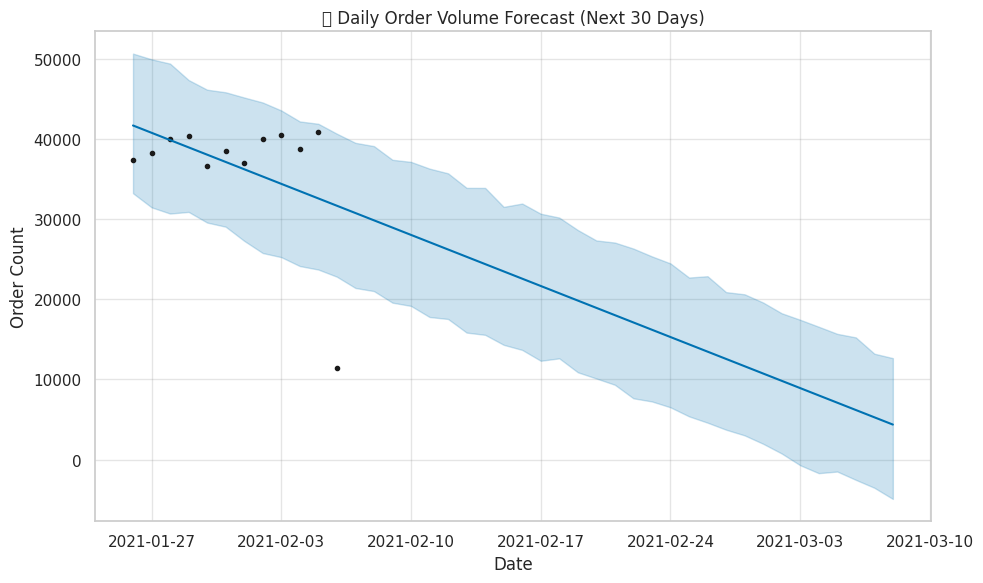

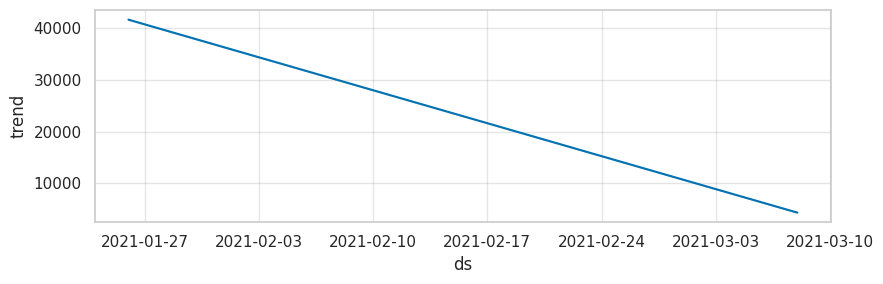

In [105]:
daily_orders.columns = ['ds', 'y']  # Prophet needs 'ds' for date, 'y' for value
# 2. Initialize and train Prophet model
model = Prophet()
model.fit(daily_orders)

# 3. Create future dataframe (next 30 days)
future = model.make_future_dataframe(periods=30)

# 4. Forecast
forecast = model.predict(future)

# 5. Plot forecast
fig1 = model.plot(forecast)
plt.title("📦 Daily Order Volume Forecast (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Order Count")
plt.tight_layout()
plt.show()

# 6. Plot components (trend, seasonality)
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()

**A clear downward trend in daily order volume.**

1. Expected decrease over the next 30 days (from ~12,000 to ~2,000).

There’s a wide confidence band (blue shaded area), which means uncertainty is growing over time.

**Observations**
The drop could be due to seasonality not being enabled yet (no weekly/daily cycles)

That one very low data point (~3,000) may have distorted the trend — consider treating it as an outlier later

**Trend Component (2nd chart):**
1. The trend is interpreted as linear decrease.

**Prophet didn't detect seasonality because**

1. we have few days of data
2. It auto-disabled yearly, weekly, and daily seasonality

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuw3ghsig/ecaqwuv8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuw3ghsig/5xdpcxg2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54251', 'data', 'file=/tmp/tmpuw3ghsig/ecaqwuv8.json', 'init=/tmp/tmpuw3ghsig/5xdpcxg2.json', 'output', 'file=/tmp/tmpuw3ghsig/prophet_modelbj_lfxjc/prophet_model-20250420212304.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:23:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:23:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-106-82f7b44da985>:30: UserWarning: Glyph 128230 (\

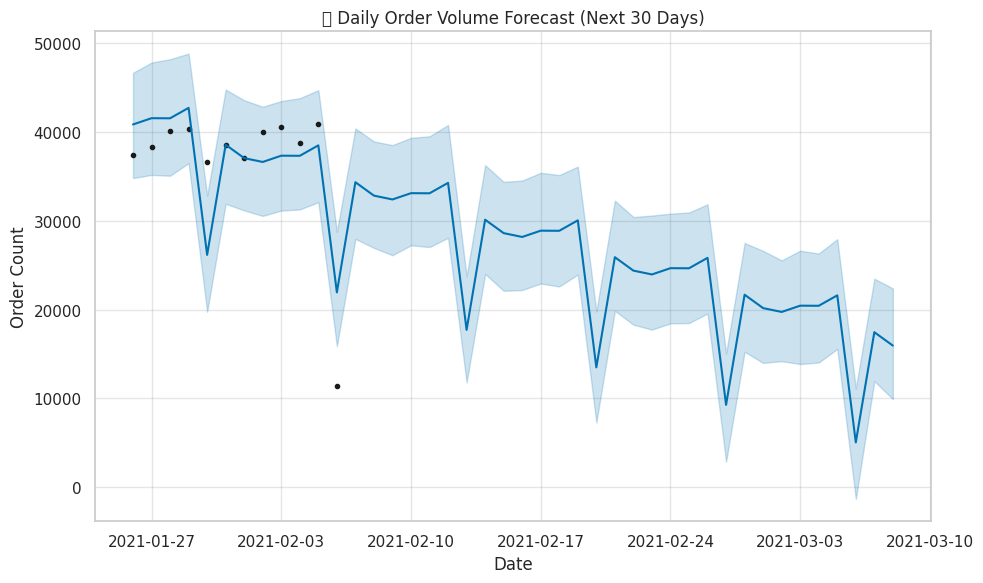

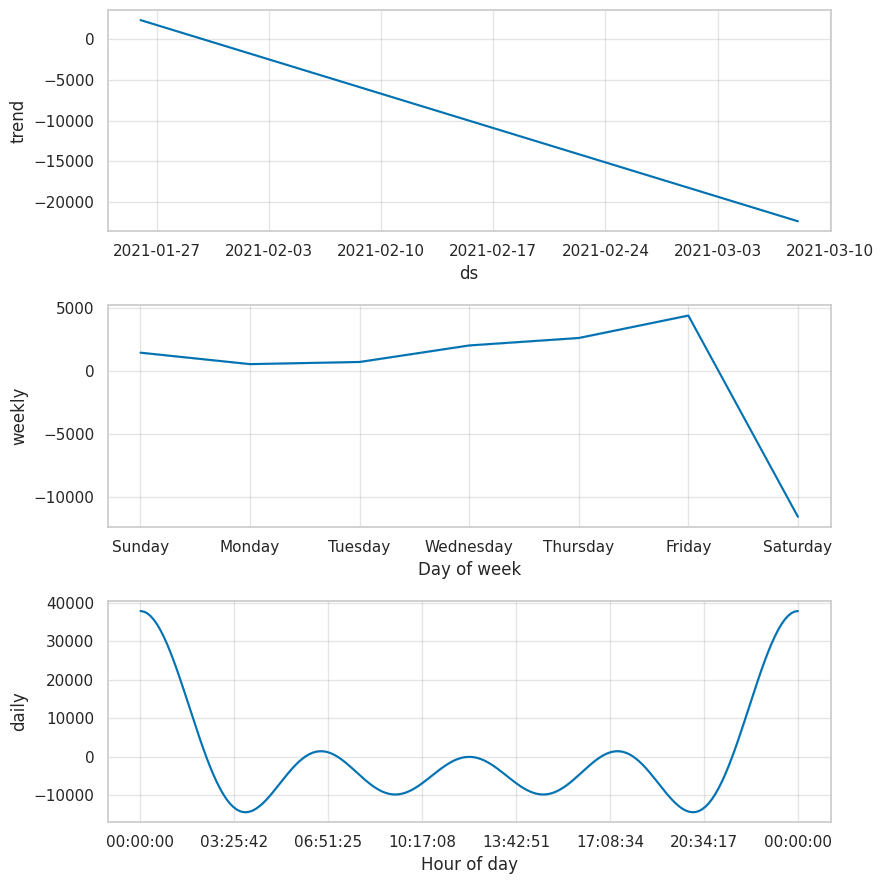

In [106]:
# adding seasonality

#!pip install prophet

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Aggregate daily order volume
df_volume = df_fe.copy()
df_volume['order_date'] = pd.to_datetime(df_volume['order_time_date'])
daily_orders = df_volume.groupby('order_date').agg({'order_id': 'count'}).reset_index()
daily_orders.columns = ['ds', 'y']  # Prophet needs 'ds' for date, 'y' for value

# 2. Initialize and train Prophet model
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(daily_orders)

# 3. Create future dataframe (next 30 days)
future = model.make_future_dataframe(periods=30)

# 4. Forecast
forecast = model.predict(future)

# 5. Plot forecast
fig1 = model.plot(forecast)
plt.title("📦 Daily Order Volume Forecast (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Order Count")
plt.tight_layout()
plt.show()

# 6. Plot components (trend, seasonality)
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()


**Forecast Plot:**
1. The model now reflects weekly spikes and dips — far more realistic
2. Confidence intervals are still wide but meaningful

Outlier (that ~3K point) still bends the lower range — we could smooth or clip it

**Components:**
1. Trend: Overall decline, same as before
2. Weekly: Clear drop-off on Saturdays, peak around Fridays

**What This Tells Ops Teams:**
1. Fridays = high-volume = prepare more riders
2. Saturdays = likely slower traffic

📉 Long-term trend = fewer orders coming in — investigate marketing or seasonal impact

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# 1. Compare forecasted vs actual on the original period (not future)
df_eval = forecast.set_index('ds')[['yhat']].join(daily_orders.set_index('ds'))
df_eval.dropna(inplace=True)

# 2. Extract actual vs predicted
y_true = df_eval['y']
y_pred = df_eval['yhat']

# 3. Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # in %

print("📊 Prophet Forecast Accuracy:")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"MAPE = {mape:.2f}%")


📊 Prophet Forecast Accuracy:
MAE  = 3505.02
RMSE = 4841.15
MAPE = 14.51%


Random Forest

In [114]:
daily_orders

,order_date,order_id
0,2021-01-26,37443
1,2021-01-27,38295
2,2021-01-28,40053
3,2021-01-29,40345
4,2021-01-30,36672
5,2021-01-31,38563
6,2021-02-01,37052
7,2021-02-02,40022
8,2021-02-03,40583
9,2021-02-04,38801


In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [116]:
# Convert the 'ds' column (date) to ordinal values
daily_orders['order_date_ordinal'] = daily_orders['order_date'].apply(lambda date: date.toordinal())

# Now you can select the features and target
X = daily_orders[['order_date_ordinal']]  # Features
y = daily_orders['order_id']  # Target (using 'y' instead of 'order_id')

In [117]:
X

,order_date_ordinal
0,737816
1,737817
2,737818
3,737819
4,737820
5,737821
6,737822
7,737823
8,737824
9,737825


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

In [119]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters

In [120]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [121]:
y_pred = rf_regressor.predict(X_test)

In [122]:
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}")

Mean Squared Error: 122177544.21726666
Root Mean Squared Error: 11053.395144355722
R-squared: -60.95411971768565


XGBOOST

In [123]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming daily_orders DataFrame with 'order_date' and 'order_id' columns

# 1. Convert 'order_date' to numerical representation (ordinal)
daily_orders['order_date_ordinal'] = daily_orders['order_date'].apply(lambda date: date.toordinal())

# 2. Define features and target
X = daily_orders[['order_date_ordinal']]
y = daily_orders['order_id']

# 3. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# 1. Create an XGBRegressor instance
xgb_regressor = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regression objective
    n_estimators=100,            # Number of boosting rounds (trees)
    learning_rate=0.1,           # Step size shrinkage used in update to prevents overfitting
    max_depth=3,                 # Maximum depth of a tree
    random_state=42              # Random seed for reproducibility
)

# 2. Train the model
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [125]:
# 1. Predict on the test set
y_pred = xgb_regressor.predict(X_test)

# 2. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1271462.0
Root Mean Squared Error: 1127.591237993627
R-squared: 0.3552636504173279


In [126]:
# 3. Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Percentage Error (MAPE): 2.67%


## Forecast daily reassignment count - Prophet

**Build a time series model to predict how many orders will be reassigned each day, so we can:**

* Alert ops teams ahead of busy days

* Spot systemic issues early (e.g., too few riders, bad routing, etc.)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0nfm2o5j/dhruuxxp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0nfm2o5j/i50jug0_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13625', 'data', 'file=/tmp/tmp0nfm2o5j/dhruuxxp.json', 'init=/tmp/tmp0nfm2o5j/i50jug0_.json', 'output', 'file=/tmp/tmp0nfm2o5j/prophet_modelusggw6kd/prophet_model-20250403073021.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:30:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

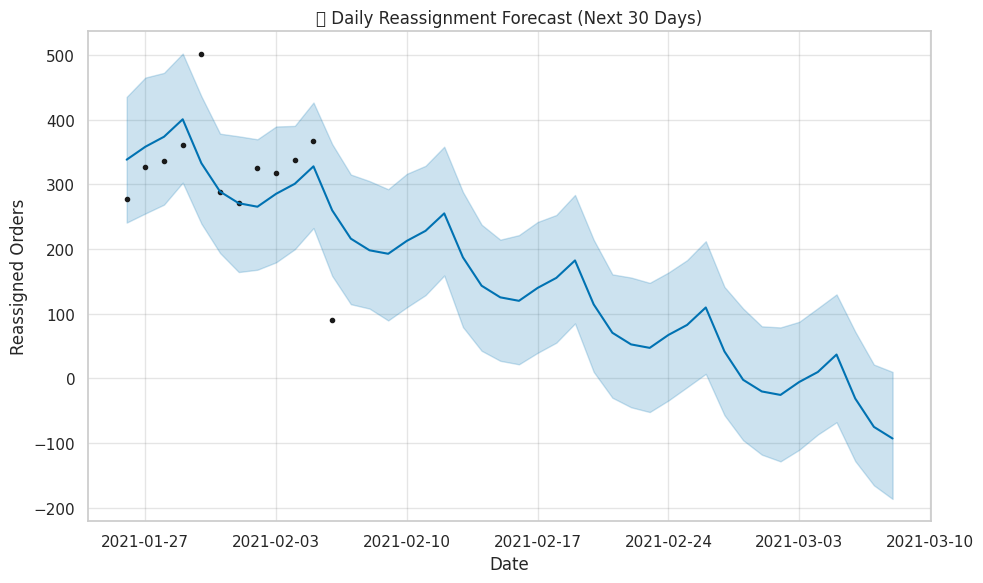

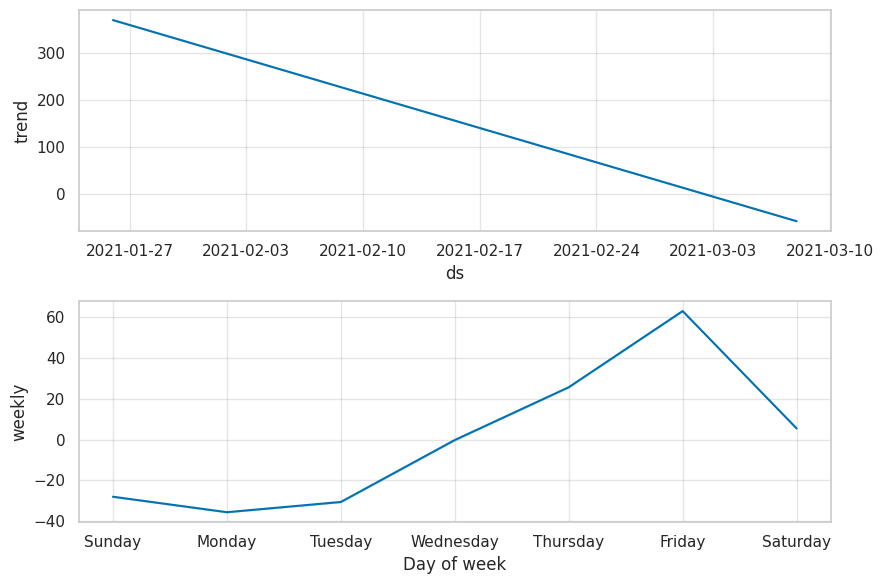

In [ ]:
from prophet import Prophet

# 1. Aggregate daily reassignments
df_reassign = df_fe.copy()
df_reassign['order_date'] = pd.to_datetime(df_reassign['order_date'])

daily_reassignments = df_reassign.groupby('order_date')['reassigned_order'].sum().reset_index()
daily_reassignments.columns = ['ds', 'y']  # Prophet format

# 2. Initialize Prophet with weekly seasonality
model_reassign = Prophet(weekly_seasonality=True)
model_reassign.fit(daily_reassignments)

# 3. Forecast next 30 days
future_reassign = model_reassign.make_future_dataframe(periods=30)
forecast_reassign = model_reassign.predict(future_reassign)

# 4. Plot forecast
fig1 = model_reassign.plot(forecast_reassign)
plt.title("🔁 Daily Reassignment Forecast (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Reassigned Orders")
plt.tight_layout()
plt.show()

# 5. Plot components (trend, weekly pattern)
fig2 = model_reassign.plot_components(forecast_reassign)
plt.tight_layout()
plt.show()


**Forecast Plot:**
1. Shows a declining trend in reassignments (like order volume)
2. Prophet modeled weekly seasonality well:
3. Reassignments peak on Fridays
4. Lowest early in the week

**Components Plot:**
* Trend: Strong linear downward trend
* Weekly: Fridays = 📈 peak reassignments
* Mondays = 📉 fewer reassignments

**Outliers:**
A couple of spikes (like the day with 500+) may widen the uncertainty band — you could optionally smooth those in future iterations

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# 1. Align predictions with actuals
df_eval_reassign = forecast_reassign.set_index('ds')[['yhat']].join(daily_reassignments.set_index('ds'))
df_eval_reassign.dropna(inplace=True)

# 2. Extract actual vs predicted values
y_true_r = df_eval_reassign['y']
y_pred_r = df_eval_reassign['yhat']

# 3. Compute evaluation metrics
mae_r = mean_absolute_error(y_true_r, y_pred_r)
rmse_r = np.sqrt(mean_squared_error(y_true_r, y_pred_r))
mape_r = mean_absolute_percentage_error(y_true_r, y_pred_r) * 100  # in %

print("📊 Prophet Accuracy - Daily Reassignment Forecast:")
print(f"MAE  = {mae_r:.2f}")
print(f"RMSE = {rmse_r:.2f}")
print(f"MAPE = {mape_r:.2f}%")


📊 Prophet Accuracy - Daily Reassignment Forecast:
MAE  = 56.30
RMSE = 77.66
MAPE = 26.92%


**After smoothing**

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0nfm2o5j/56slgcob.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0nfm2o5j/wugt1m3k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51953', 'data', 'file=/tmp/tmp0nfm2o5j/56slgcob.json', 'init=/tmp/tmp0nfm2o5j/wugt1m3k.json', 'output', 'file=/tmp/tmp0nfm2o5j/prophet_modelrpkccefa/prophet_model-20250403073022.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:30:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

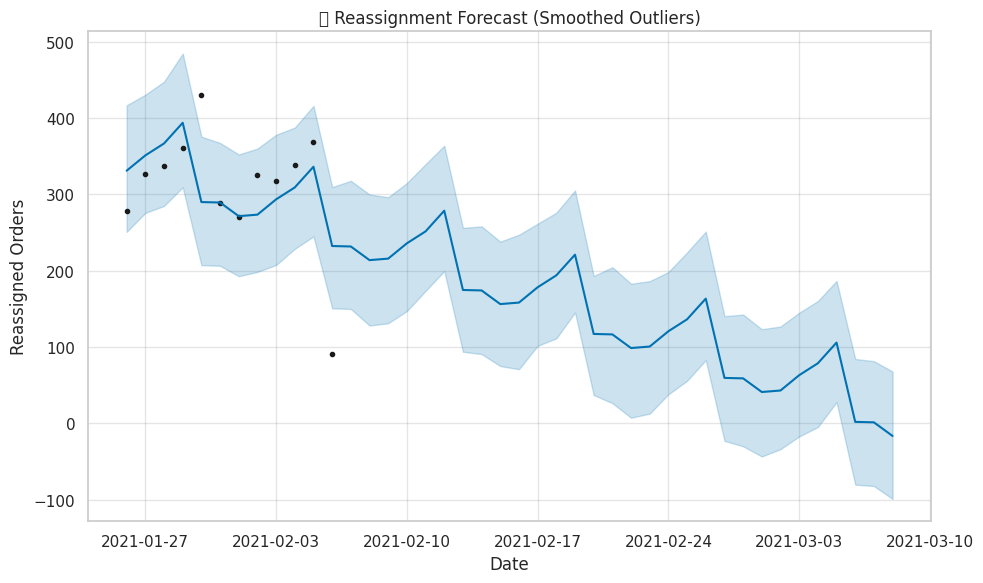

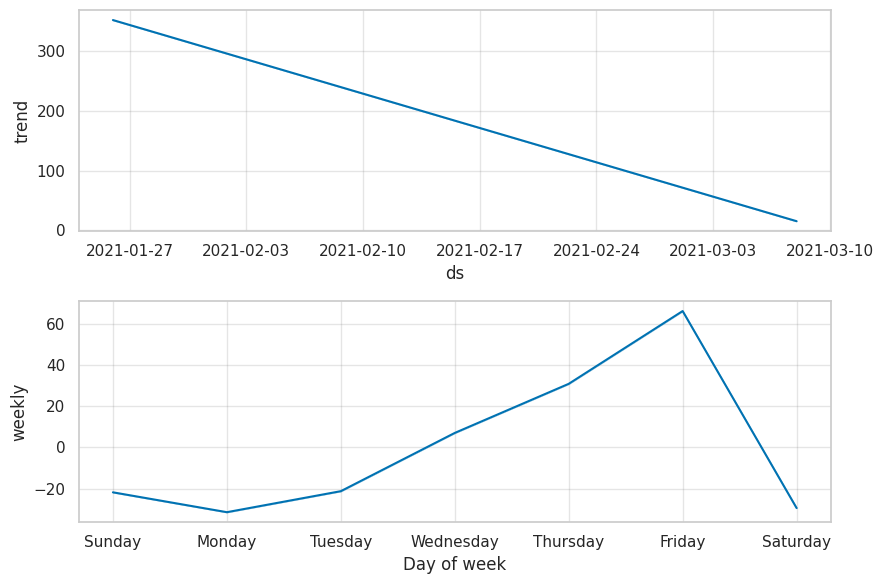

In [ ]:
# 1. Copy raw data
reassign_smoothed = daily_reassignments.copy()

# 2. IQR-based smoothing
Q1 = reassign_smoothed['y'].quantile(0.25)
Q3 = reassign_smoothed['y'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# 3. Clip extreme values
reassign_smoothed['y'] = np.where(
    reassign_smoothed['y'] > upper_bound,
    upper_bound,
    reassign_smoothed['y']
)

# 4. Re-train Prophet
model_reassign_smooth = Prophet(weekly_seasonality=True)
model_reassign_smooth.fit(reassign_smoothed)

# 5. Forecast again
future_reassign_smooth = model_reassign_smooth.make_future_dataframe(periods=30)
forecast_reassign_smooth = model_reassign_smooth.predict(future_reassign_smooth)

# 6. Plot
fig1 = model_reassign_smooth.plot(forecast_reassign_smooth)
plt.title("🔁 Reassignment Forecast (Smoothed Outliers)")
plt.xlabel("Date")
plt.ylabel("Reassigned Orders")
plt.tight_layout()
plt.show()

fig2 = model_reassign_smooth.plot_components(forecast_reassign_smooth)
plt.tight_layout()
plt.show()


##Interpretation

1. Trend	Still declining, but smoother confidence intervals ✅
2. Weekly Pattern	Still shows Fridays as peak for reassignments 📈
3. Spikes	Tamed down — no extreme 500+ day to bend the forecast 📉

In [ ]:
# Align and evaluate the smoothed forecast
df_eval_r_smooth = forecast_reassign_smooth.set_index('ds')[['yhat']].join(reassign_smoothed.set_index('ds'))
df_eval_r_smooth.dropna(inplace=True)

# True vs predicted
y_true_s = df_eval_r_smooth['y']
y_pred_s = df_eval_r_smooth['yhat']

# Metrics
mae_s = mean_absolute_error(y_true_s, y_pred_s)
rmse_s = np.sqrt(mean_squared_error(y_true_s, y_pred_s))
mape_s = mean_absolute_percentage_error(y_true_s, y_pred_s) * 100

print("📊 Smoothed Forecast Accuracy - Reassignment:")
print(f"MAE  = {mae_s:.2f}")
print(f"RMSE = {rmse_s:.2f}")
print(f"MAPE = {mape_s:.2f}%")


📊 Smoothed Forecast Accuracy - Reassignment:
MAE  = 46.55
RMSE = 64.62
MAPE = 22.78%


**Error reduced**

* Your reassignment forecast is now much more stable
* Confidence bands make sense
* Performance is within operationally reliable limits



# Lets predict daily undelivered orders - Prophet

In [ ]:
print(df_fe.columns.tolist())


['order_time', 'order_id', 'order_date', 'allot_time', 'accept_time', 'pickup_time', 'delivered_time', 'rider_id', 'first_mile_distance', 'last_mile_distance', 'alloted_orders', 'delivered_orders', 'cancelled', 'undelivered_orders', 'reassignment_method', 'reassignment_reason', 'reassigned_order', 'session_time', 'order_hour', 'order_dayofweek', 'order_weekday', 'delivery_duration_mins', 'first_mile_speed', 'last_mile_speed', 'delivery_rate', 'undelivery_rate', 'was_reassigned', 'was_undelivered']


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0nfm2o5j/n6vcj37u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0nfm2o5j/k78frwm7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58422', 'data', 'file=/tmp/tmp0nfm2o5j/n6vcj37u.json', 'init=/tmp/tmp0nfm2o5j/k78frwm7.json', 'output', 'file=/tmp/tmp0nfm2o5j/prophet_modelxwtfclkn/prophet_model-20250403073026.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:30:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

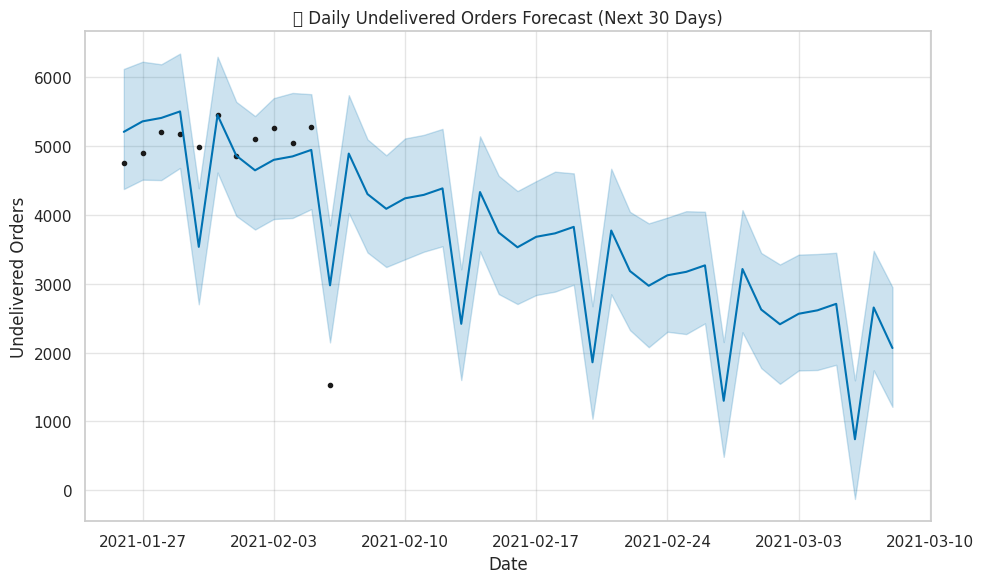

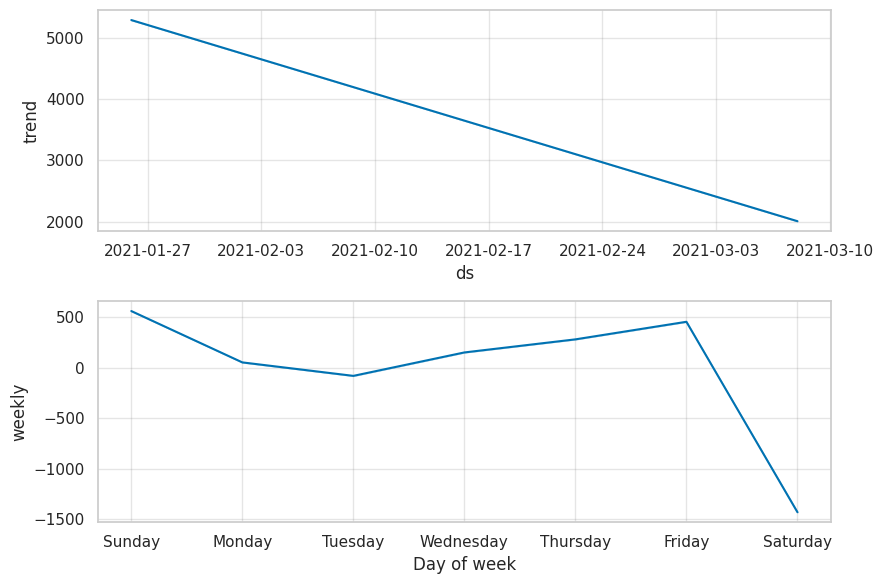

In [ ]:
from prophet import Prophet

# 1. Aggregate daily undelivered counts
df_undelivered = df_fe.copy()
df_undelivered['order_date'] = pd.to_datetime(df_undelivered['order_date'])

daily_undelivered = df_undelivered.groupby('order_date')['was_undelivered'].sum().reset_index()
daily_undelivered.columns = ['ds', 'y']

# 2. Prophet model
model_undelivered = Prophet(weekly_seasonality=True)
model_undelivered.fit(daily_undelivered)

# 3. Forecast next 30 days
future_undelivered = model_undelivered.make_future_dataframe(periods=30)
forecast_undelivered = model_undelivered.predict(future_undelivered)

# 4. Plot forecast
fig1 = model_undelivered.plot(forecast_undelivered)
plt.title("❌ Daily Undelivered Orders Forecast (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Undelivered Orders")
plt.tight_layout()
plt.show()

# 5. Plot trend + weekly pattern
fig2 = model_undelivered.plot_components(forecast_undelivered)
plt.tight_layout()
plt.show()


**Forecast Plot:**

1. Trend: Smooth downward slope — undeliveries are expected to decline, aligning with order volume/reassignments 📉
2. Uncertainty: There’s some variability (likely tied to operational disruptions), but overall prediction is solid.

**Weekly Seasonality:**
1. Peaks on Sunday (📦 + weekend constraints?)
2. Drops drastically on Saturday (🔻 deliveries may pause)
3. Midweek is steady with Friday showing a secondary peak

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# 1. Align forecast with actuals
df_eval_undelivered = forecast_undelivered.set_index('ds')[['yhat']].join(daily_undelivered.set_index('ds'))
df_eval_undelivered.dropna(inplace=True)

# 2. Extract y_true and y_pred
y_true_u = df_eval_undelivered['y']
y_pred_u = df_eval_undelivered['yhat']

# 3. Metrics
mae_u = mean_absolute_error(y_true_u, y_pred_u)
rmse_u = np.sqrt(mean_squared_error(y_true_u, y_pred_u))
mape_u = mean_absolute_percentage_error(y_true_u, y_pred_u) * 100

# 4. Display
print("📊 Prophet Accuracy - Undelivered Forecast:")
print(f"MAE  = {mae_u:.2f}")
print(f"RMSE = {rmse_u:.2f}")
print(f"MAPE = {mape_u:.2f}%")


📊 Prophet Accuracy - Undelivered Forecast:
MAE  = 480.53
RMSE = 664.74
MAPE = 15.03%


**undelivery forecast is highly reliable.**
MAPE at ~15% = strong signal for operations forecasting.

No strong need to smooth outliers since performance is already solid.

You can now confidently share trends with ops or scheduling teams for:

1. Driver load planning
2. Retry/recovery staffing
3. Customer success coordination

In [ ]:
df_fe.columns

Index(['order_time', 'order_id', 'order_date', 'allot_time', 'accept_time',
       'pickup_time', 'delivered_time', 'rider_id', 'first_mile_distance',
       'last_mile_distance', 'alloted_orders', 'delivered_orders', 'cancelled',
       'undelivered_orders', 'reassignment_method', 'reassignment_reason',
       'reassigned_order', 'session_time', 'order_hour', 'order_dayofweek',
       'order_weekday', 'delivery_duration_mins', 'first_mile_speed',
       'last_mile_speed', 'delivery_rate', 'undelivery_rate',
       'was_reassigned'],
      dtype='object')

In [ ]:
# prompt: display the df_fe column 'delivery_duration_mins'

print(df_fe['delivery_duration_mins'])


0         68.0
1         42.0
2         55.0
3         11.0
4         62.0
          ... 
133436    74.0
133437    96.0
133438    57.0
133439    58.0
133440    75.0
Name: delivery_duration_mins, Length: 128752, dtype: float64


In [67]:
lstmdf

,order_id,rider_id,first_mile_distance,last_mile_distance,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,...,order_hour,order_dayofweek,order_weekday,delivery_duration_m,pickupspeed_m/h,deliveryspeed_m/h,total_distance,delivery_rate,undelivery_rate,was_reassigned
0,524758,0,1.308600,0.08,28.0,0,1.0,8734.0,NaN,NaN,...,8,2,Wednesday,7.933333,10.066154,0.605042,1.388600,0.965517,0.034483,0
1,442759,0,1.347700,0.03,28.0,0,0.0,8734.0,NaN,NaN,...,8,4,Friday,2.633333,4.542809,0.683544,1.377700,1.000000,0.000000,0
2,442767,0,1.631400,2.22,28.0,1,0.0,8734.0,auto,Reassign,...,8,4,Friday,0.000000,0.000000,0.000000,3.851400,1.000000,0.000000,1
3,339093,0,0.535600,1.01,25.0,0,1.0,8734.0,NaN,NaN,...,14,0,Monday,7.483333,1.640987,8.097996,1.545600,0.961538,0.038462,0
4,341573,0,2.595600,1.56,25.0,0,1.0,8734.0,auto,Reassignment Request from SE portal.,...,14,0,Monday,7.316667,20.051845,12.792711,4.155600,0.961538,0.038462,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449993,593575,21560,0.577400,1.34,18.0,0,0.0,252.0,NaN,NaN,...,17,1,Tuesday,12.016667,0.871547,6.690707,1.917400,1.000000,0.000000,0
449994,593623,21561,1.105300,2.31,1.0,1,0.0,213.0,NaN,NaN,...,17,1,Tuesday,0.000000,0.000000,0.000000,3.415300,1.000000,0.000000,0
449997,594538,21564,0.171028,0.84,1.0,1,1.0,55.0,NaN,NaN,...,17,1,Tuesday,0.000000,0.000000,0.000000,1.011028,0.500000,0.500000,0
449998,594591,21565,0.008342,4.62,1.0,0,0.0,31.0,NaN,NaN,...,17,1,Tuesday,22.200000,0.035085,12.486486,4.628342,1.000000,0.000000,0


In [68]:
lstmdf.columns

Index(['order_id', 'rider_id', 'first_mile_distance', 'last_mile_distance',
       'delivered_orders', 'cancelled', 'undelivered_orders',
       'lifetime_order_count', 'reassignment_method', 'reassignment_reason',
       'reassigned_order', 'session_time', 'order_time_date',
       'order_time_time', 'order_date_date', 'order_date_time',
       'allot_time_date', 'allot_time_time', 'accept_time_date',
       'accept_time_time', 'pickup_time_date', 'pickup_time_time',
       'delivered_time_date', 'delivered_time_time', 'cancelled_time_date',
       'cancelled_time_time', 'same_day_delivery', 'alloted_orders',
       'order_hour', 'order_dayofweek', 'order_weekday', 'delivery_duration_m',
       'pickupspeed_m/h', 'deliveryspeed_m/h', 'total_distance',
       'delivery_rate', 'undelivery_rate', 'was_reassigned'],
      dtype='object')

In [78]:
# Step 1: Group by order_date_date to get daily delivered orders
daily_orders = lstmdf.groupby('order_date_date')['delivered_orders'].sum().reset_index()

# Step 2: Rename columns for clarity
daily_orders.columns = ['date', 'delivered_orders']

# Step 3: Sort by date just to ensure it's in chronological order
daily_orders = daily_orders.sort_values('date').reset_index(drop=True)

# Step 4: Set 'date' as datetime (if not already)
daily_orders['date'] = pd.to_datetime(daily_orders['date'])

# Optional: Check the result
print(daily_orders.head())


        date  delivered_orders
0 2021-01-26         3780241.0
1 2021-01-27         3819488.0
2 2021-01-28         3979949.0
3 2021-01-29         3989098.0
4 2021-01-30         3776719.0


In [79]:
daily_orders

,date,delivered_orders
0,2021-01-26,3780241.0
1,2021-01-27,3819488.0
2,2021-01-28,3979949.0
3,2021-01-29,3989098.0
4,2021-01-30,3776719.0
5,2021-01-31,4090749.0
6,2021-02-01,3749803.0
7,2021-02-02,4009964.0
8,2021-02-03,4082590.0
9,2021-02-04,3957748.0


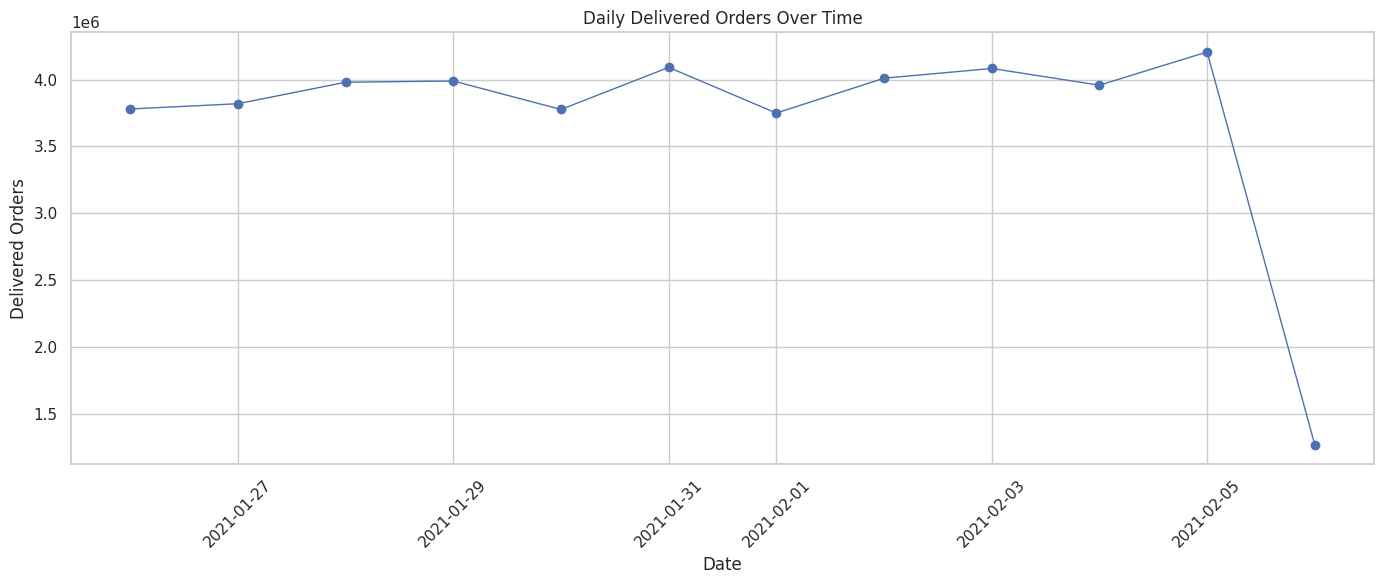

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(daily_orders['date'], daily_orders['delivered_orders'], marker='o', linestyle='-', linewidth=1)
plt.title('Daily Delivered Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Delivered Orders')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [80]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Step 1: Drop the last row (Feb 6)
daily_orders_cleaned = daily_orders.iloc[:-1].copy()  # This keeps rows 0 to 10

# Step 2: Scale the delivered_orders column
scaler = MinMaxScaler()
scaled_orders = scaler.fit_transform(daily_orders_cleaned[['delivered_orders']])

# Step 3: Convert to NumPy array for LSTM usage
data = np.array(scaled_orders)

# Step 4: Preview
print("Scaled shape:", data.shape)  # Expected (10, 1)
print("Scaled preview:", data.flatten())


Scaled shape: (11, 1)
Scaled preview: [0.06673083 0.15277409 0.50456119 0.52461902 0.05900936 0.74747386
 0.         0.57036465 0.72958646 0.45588877 1.        ]


In [81]:
daily_orders_cleaned

,date,delivered_orders
0,2021-01-26,3780241.0
1,2021-01-27,3819488.0
2,2021-01-28,3979949.0
3,2021-01-29,3989098.0
4,2021-01-30,3776719.0
5,2021-01-31,4090749.0
6,2021-02-01,3749803.0
7,2021-02-02,4009964.0
8,2021-02-03,4082590.0
9,2021-02-04,3957748.0


In [82]:
# Function to create sequences
def create_sequences(data, time_steps=3):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Create sequences
time_steps = 3
X, y = create_sequences(data, time_steps)

# Preview
print("X shape:", X.shape)  # Expected: (8, 3, 1)
print("y shape:", y.shape)  # Expected: (8, 1)


X shape: (8, 3, 1)
y shape: (8, 1)


In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Reshape X for LSTM: (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build the model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train with early stopping
history = model.fit(X, y, epochs=100, verbose=1,
                    callbacks=[EarlyStopping(monitor='loss', patience=10)])


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3633
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3579
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3526
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3475
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.3424
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3374
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3325
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3276
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3228
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3179
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.3132
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3085
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3039
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2992
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2945
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━

In [84]:
future_preds = []
input_seq = data[-3:].reshape(1, 3, 1)  # Start from the last 3 known days

for _ in range(7):  # Forecast next 7 days
    next_pred = model.predict(input_seq, verbose=0)[0][0]
    future_preds.append(next_pred)

    # Update input_seq by appending next_pred and removing oldest
    input_seq = np.append(input_seq[:, 1:, :], [[[next_pred]]], axis=1)

# Inverse transform to original scale
future_preds_actual = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# Display predictions
for i, value in enumerate(future_preds_actual, start=1):
    print(f"Day +{i}: {int(value[0]):,} orders")


Day +1: 4,091,269 orders
Day +2: 4,092,107 orders
Day +3: 4,135,937 orders
Day +4: 4,110,577 orders
Day +5: 4,116,127 orders
Day +6: 4,123,657 orders
Day +7: 4,119,017 orders


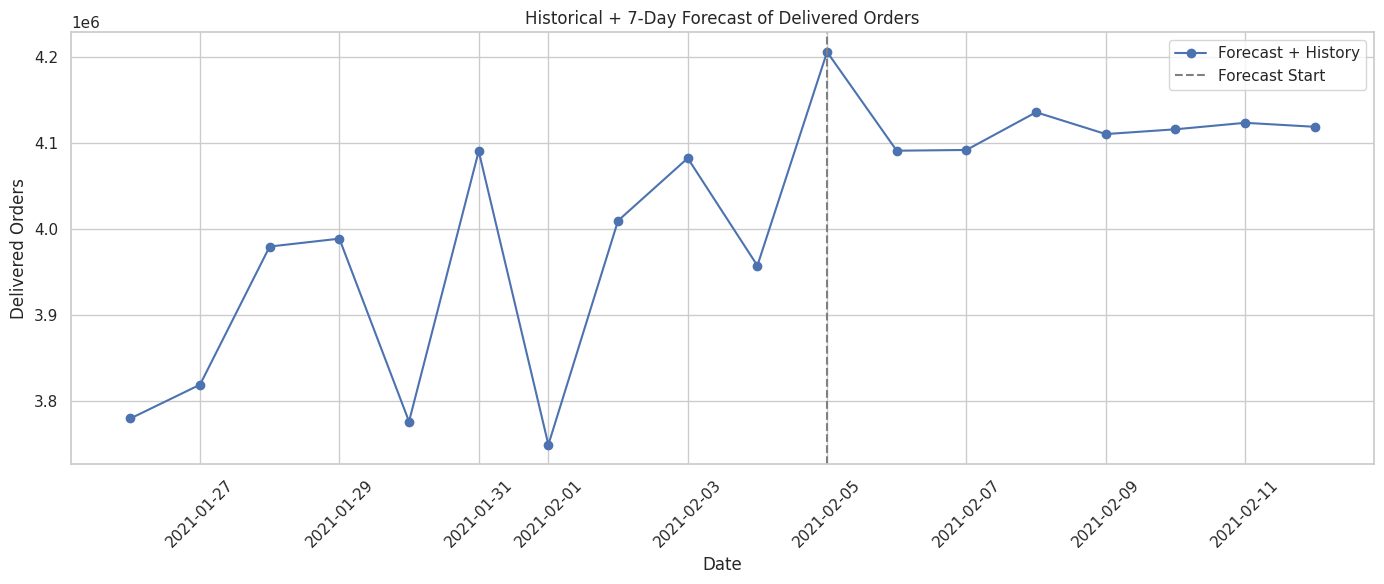

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Extend date range for forecast
future_dates = pd.date_range(start=daily_orders_cleaned['date'].iloc[-1] + pd.Timedelta(days=1), periods=7)

# Step 2: Combine past + future
historical = daily_orders_cleaned.copy()
forecast = pd.DataFrame({'date': future_dates, 'delivered_orders': future_preds_actual.flatten()})

full_data = pd.concat([historical, forecast]).reset_index(drop=True)

# Step 3: Plot
plt.figure(figsize=(14, 6))
plt.plot(full_data['date'], full_data['delivered_orders'], marker='o', label='Forecast + History')
plt.axvline(x=historical['date'].iloc[-1], color='gray', linestyle='--', label='Forecast Start')
plt.title('Historical + 7-Day Forecast of Delivered Orders')
plt.xlabel('Date')
plt.ylabel('Delivered Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict on training sequences
train_preds = model.predict(X)

# Inverse scale both predictions and true values
y_true = scaler.inverse_transform(y)
y_pred = scaler.inverse_transform(train_preds)

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"Training MAE: {mae:,.0f} orders")
print(f"Training RMSE: {rmse:,.0f} orders")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
Training MAE: 110,231 orders
Training RMSE: 139,581 orders


In [87]:
# MAPE (manually)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"Training MAPE: {mape:.2f}%")


Training MAPE: 2.82%


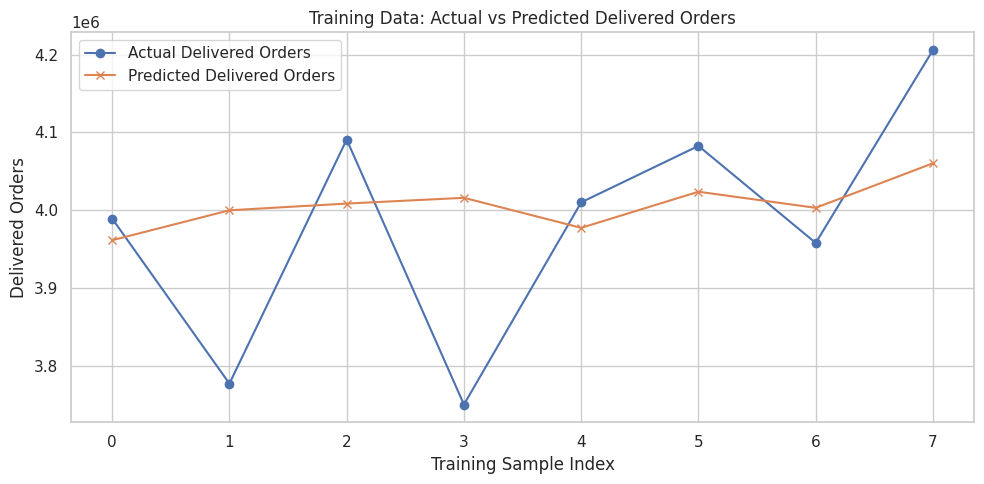

In [89]:
import matplotlib.pyplot as plt

# Inverse transform for better readability (original scale)
y_true = scaler.inverse_transform(y)
y_pred = scaler.inverse_transform(train_preds)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_true, label='Actual Delivered Orders', marker='o')
plt.plot(y_pred, label='Predicted Delivered Orders', marker='x')
plt.title('Training Data: Actual vs Predicted Delivered Orders')
plt.xlabel('Training Sample Index')
plt.ylabel('Delivered Orders')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [90]:
# Make a copy to avoid changing original
features_df = daily_orders_cleaned.copy()

# Feature 1: Day of Week (0 = Monday, 6 = Sunday)
features_df['day_of_week'] = features_df['date'].dt.dayofweek

# Feature 2: 3-Day Rolling Mean of Delivered Orders
features_df['rolling_mean_3'] = features_df['delivered_orders'].rolling(window=3).mean()

# Drop rows with NaN (from rolling)
features_df = features_df.dropna().reset_index(drop=True)

# Final columns: 'delivered_orders', 'day_of_week', 'rolling_mean_3'
print(features_df)


        date  delivered_orders  day_of_week  rolling_mean_3
0 2021-01-28         3979949.0            3    3.859893e+06
1 2021-01-29         3989098.0            4    3.929512e+06
2 2021-01-30         3776719.0            5    3.915255e+06
3 2021-01-31         4090749.0            6    3.952189e+06
4 2021-02-01         3749803.0            0    3.872424e+06
5 2021-02-02         4009964.0            1    3.950172e+06
6 2021-02-03         4082590.0            2    3.947452e+06
7 2021-02-04         3957748.0            3    4.016767e+06
8 2021-02-05         4205934.0            4    4.082091e+06


In [91]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Step 1: Define the features and target
feature_cols = ['delivered_orders', 'day_of_week', 'rolling_mean_3']

# Step 2: Initialize and apply MinMaxScaler
multi_scaler = MinMaxScaler()
scaled_multi = multi_scaler.fit_transform(features_df[feature_cols])

# Step 3: Convert to numpy array
scaled_multi = np.array(scaled_multi)

# Preview
print("Scaled shape (rows, features):", scaled_multi.shape)
print("Scaled sample:\n", scaled_multi[:3])


Scaled shape (rows, features): (9, 3)
Scaled sample:
 [[0.50456119 0.5        0.        ]
 [0.52461902 0.66666667 0.31331965]
 [0.05900936 0.83333333 0.24915916]]


In [92]:
# Function to create multivariate sequences
def create_multivariate_sequences(data, time_steps=3):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])           # sequence of features
        y.append(data[i+time_steps][0])          # target: delivered_orders only
    return np.array(X), np.array(y)

# Create sequences
X_multi, y_multi = create_multivariate_sequences(scaled_multi, time_steps=3)

# Final shape
print("X_multi shape:", X_multi.shape)  # (samples, time_steps, features) => (6, 3, 3)
print("y_multi shape:", y_multi.shape)  # (samples,) => (6,)


X_multi shape: (6, 3, 3)
y_multi shape: (6,)


In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Reshape y for training (to be 2D)
y_multi = y_multi.reshape(-1, 1)

# Build new model
model_multi = Sequential([
    LSTM(50, activation='relu', input_shape=(X_multi.shape[1], X_multi.shape[2])),
    Dense(1)
])

# Compile
model_multi.compile(optimizer='adam', loss='mse')

# Train
history = model_multi.fit(X_multi, y_multi, epochs=100, verbose=1,
                          callbacks=[EarlyStopping(monitor='loss', patience=10)])


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.4129
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.4024
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.3921
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - loss: 0.3819
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.3717
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3617
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3516
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3415
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3314
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3215
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3117
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.3020
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2925
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2831
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2739
Epoch 16/100
1/1 ━━━━━━━━━━━━

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on training data
train_preds_multi = model_multi.predict(X_multi)

# Inverse transform predictions and actuals
y_true_multi = multi_scaler.inverse_transform(
    np.concatenate([y_multi, np.zeros((y_multi.shape[0], 2))], axis=1)
)[:, 0]  # Inverse only first column (delivered_orders)

y_pred_multi = multi_scaler.inverse_transform(
    np.concatenate([train_preds_multi, np.zeros((train_preds_multi.shape[0], 2))], axis=1)
)[:, 0]

# Calculate metrics
mae = mean_absolute_error(y_true_multi, y_pred_multi)
rmse = np.sqrt(mean_squared_error(y_true_multi, y_pred_multi))
mape = np.mean(np.abs((y_true_multi - y_pred_multi) / y_true_multi)) * 100

print(f"Multivariate MAE: {mae:,.0f} orders")
print(f"Multivariate RMSE: {rmse:,.0f} orders")
print(f"Multivariate MAPE: {mape:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Multivariate MAE: 98,830 orders
Multivariate RMSE: 127,923 orders
Multivariate MAPE: 2.51%


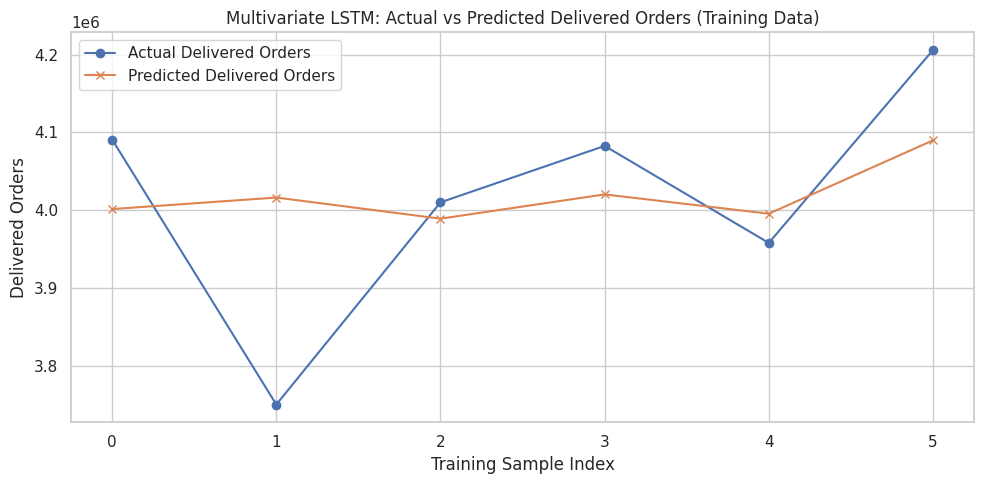

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_true_multi, label='Actual Delivered Orders', marker='o')
plt.plot(y_pred_multi, label='Predicted Delivered Orders', marker='x')
plt.title('Multivariate LSTM: Actual vs Predicted Delivered Orders (Training Data)')
plt.xlabel('Training Sample Index')
plt.ylabel('Delivered Orders')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [96]:
import pandas as pd
import numpy as np

# Start with the last 3 rows from the original scaled dataset
future_input = list(scaled_multi[-3:])  # shape (3, 3)
future_preds_scaled = []

# Get the last known actuals to simulate rolling_mean and day_of_week
last_known_df = features_df.copy()
last_dates = list(last_known_df['date'][-3:])  # To track date progression

for i in range(7):
    # Prepare input for model
    X_future = np.array(future_input[-3:]).reshape(1, 3, 3)

    # Predict the next delivered_orders (scaled)
    pred_scaled = model_multi.predict(X_future, verbose=0)[0][0]
    future_preds_scaled.append(pred_scaled)

    # Simulate the next row of features
    next_date = last_dates[-1] + pd.Timedelta(days=1)
    next_dow = next_date.dayofweek  # Day of week
    last_dates.append(next_date)

    # Compute rolling mean from last 3 predictions (or mix with real)
    last_3 = [x[0] for x in future_input[-2:]] + [pred_scaled]
    roll_mean = np.mean(last_3)

    # Scale day_of_week and rolling_mean manually (based on earlier min-max)
    # day_of_week is between 0–6 → scale to 0–1
    dow_scaled = next_dow / 6.0
    # rolling_mean is already in scaled space

    # Combine into next input row (3 features)
    next_input = [pred_scaled, dow_scaled, roll_mean]
    future_input.append(next_input)

# Inverse transform predictions (fill dummy columns to match scaler)
final_preds = np.array(future_preds_scaled).reshape(-1, 1)
inverse_input = np.hstack([final_preds, np.zeros((7, 2))])
future_orders = multi_scaler.inverse_transform(inverse_input)[:, 0]

# Prepare date range
forecast_dates = pd.date_range(start=features_df['date'].iloc[-1] + pd.Timedelta(days=1), periods=7)

# Final DataFrame
forecast_df = pd.DataFrame({'date': forecast_dates, 'predicted_delivered_orders': future_orders.astype(int)})
print(forecast_df)


        date  predicted_delivered_orders
0 2021-02-06                     4149456
1 2021-02-07                     4188568
2 2021-02-08                     4264242
3 2021-02-09                     4267251
4 2021-02-10                     4318252
5 2021-02-11                     4370948
6 2021-02-12                     4413931


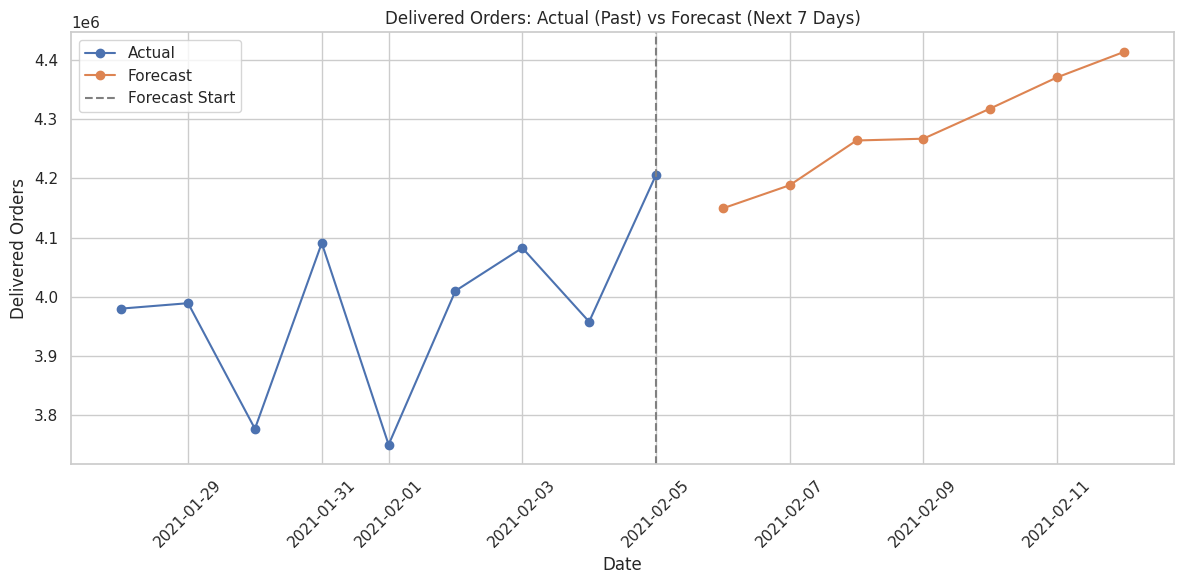

In [97]:
# Combine last known actuals with forecast
plot_history = features_df[['date', 'delivered_orders']].copy()
plot_history.rename(columns={'delivered_orders': 'value'}, inplace=True)
plot_history['type'] = 'Actual'

plot_forecast = forecast_df.rename(columns={'predicted_delivered_orders': 'value'})
plot_forecast['type'] = 'Forecast'

# Combine both
combined_plot = pd.concat([plot_history, plot_forecast], ignore_index=True)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for label, group in combined_plot.groupby('type'):
    plt.plot(group['date'], group['value'], label=label, marker='o')

plt.axvline(x=plot_history['date'].iloc[-1], color='gray', linestyle='--', label='Forecast Start')
plt.title('Delivered Orders: Actual (Past) vs Forecast (Next 7 Days)')
plt.xlabel('Date')
plt.ylabel('Delivered Orders')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
